Data loaded successfully!
Shape: (283, 8)

Columns: ['SampleID', 'Time', 'Biomass (g/L)', 'OD600 (N/A)', 'Psilocin g/L', 'Psilocybin g/L', 'Baeocystine g/L', 'Tryptamine g/L']

First few rows:
                SampleID       Time  Biomass (g/L)  OD600 (N/A)  Psilocin g/L  \
0   27-PSI_F503_C1_R1_T6  46.541389       12.17760         29.5      0.001568   
1   27-PSI_F503_C1_R1_T7  50.061667       12.38400         30.0      0.006422   
2   27-PSI_F503_C1_R1_T8  52.987778       17.00736         41.2      0.009436   
3   27-PSI_F503_C1_R1_T9  69.941944       31.45536         76.2      0.031261   
4  27-PSI_F503_C1_R1_T10  73.482222       39.79392         96.4      0.027627   

   Psilocybin g/L  Baeocystine g/L  Tryptamine g/L  
0        0.003618         0.000071        0.000706  
1        0.009526         0.000204        0.001889  
2        0.012903         0.000265        0.001894  
3        0.038406         0.000590        0.001044  
4        0.061605         0.000723        0.000885  

S

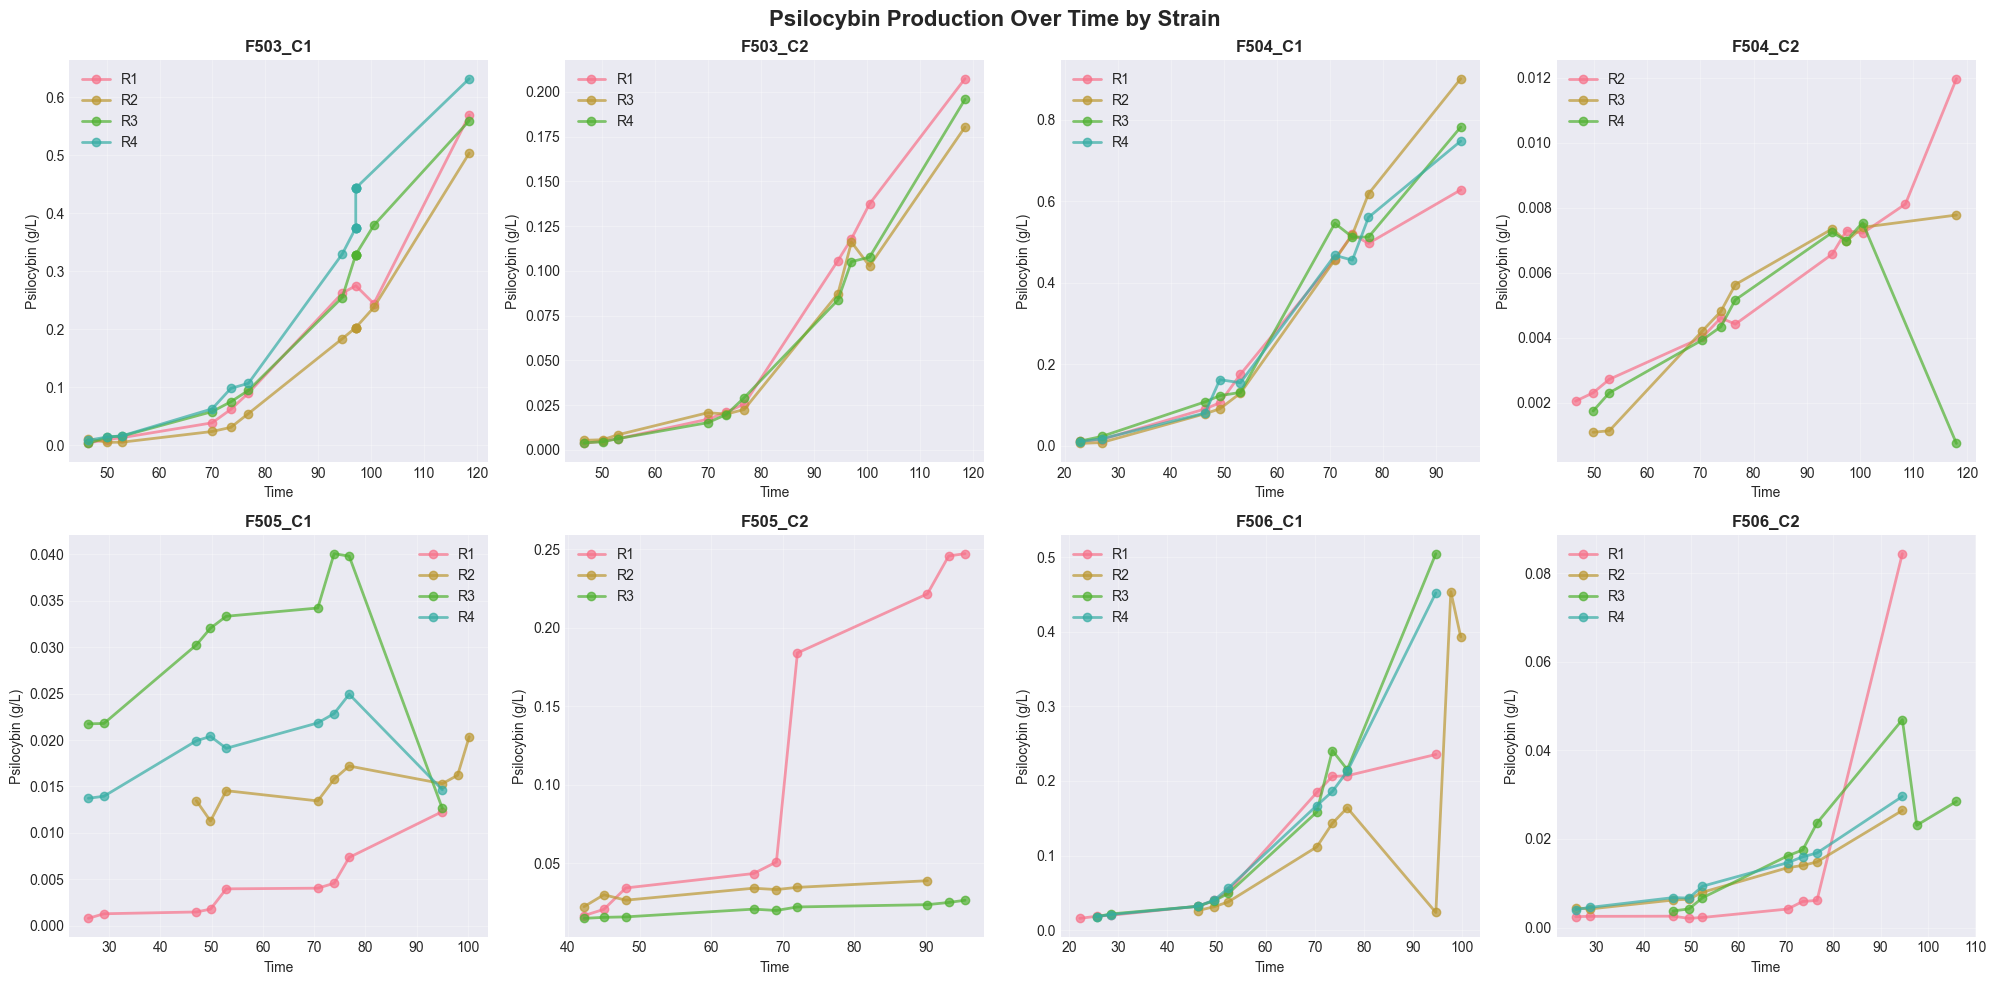


Psilocybin Production Summary by Strain:
          Mean    Std    Max    Min
Strain                             
F504_C1  0.297  0.269  0.901  0.006
F503_C1  0.206  0.182  0.632  0.003
F506_C1  0.131  0.137  0.505  0.016
F505_C2  0.059  0.075  0.247  0.015
F503_C2  0.060  0.064  0.207  0.004
F506_C2  0.014  0.016  0.084  0.002
F505_C1  0.017  0.011  0.040  0.001
F504_C2  0.005  0.003  0.012  0.001


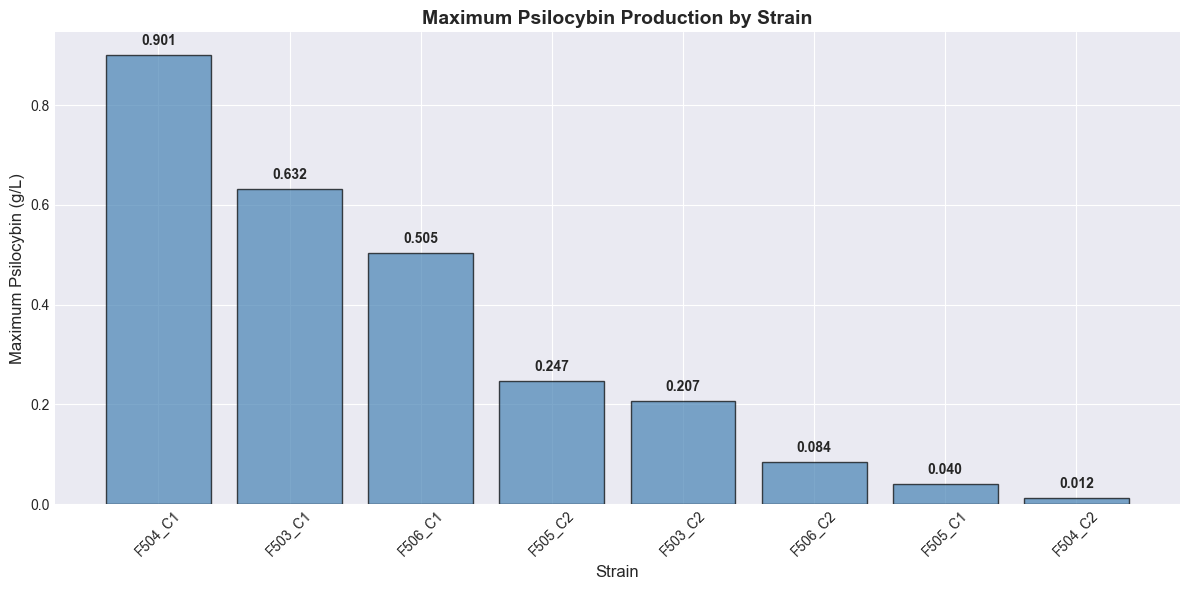

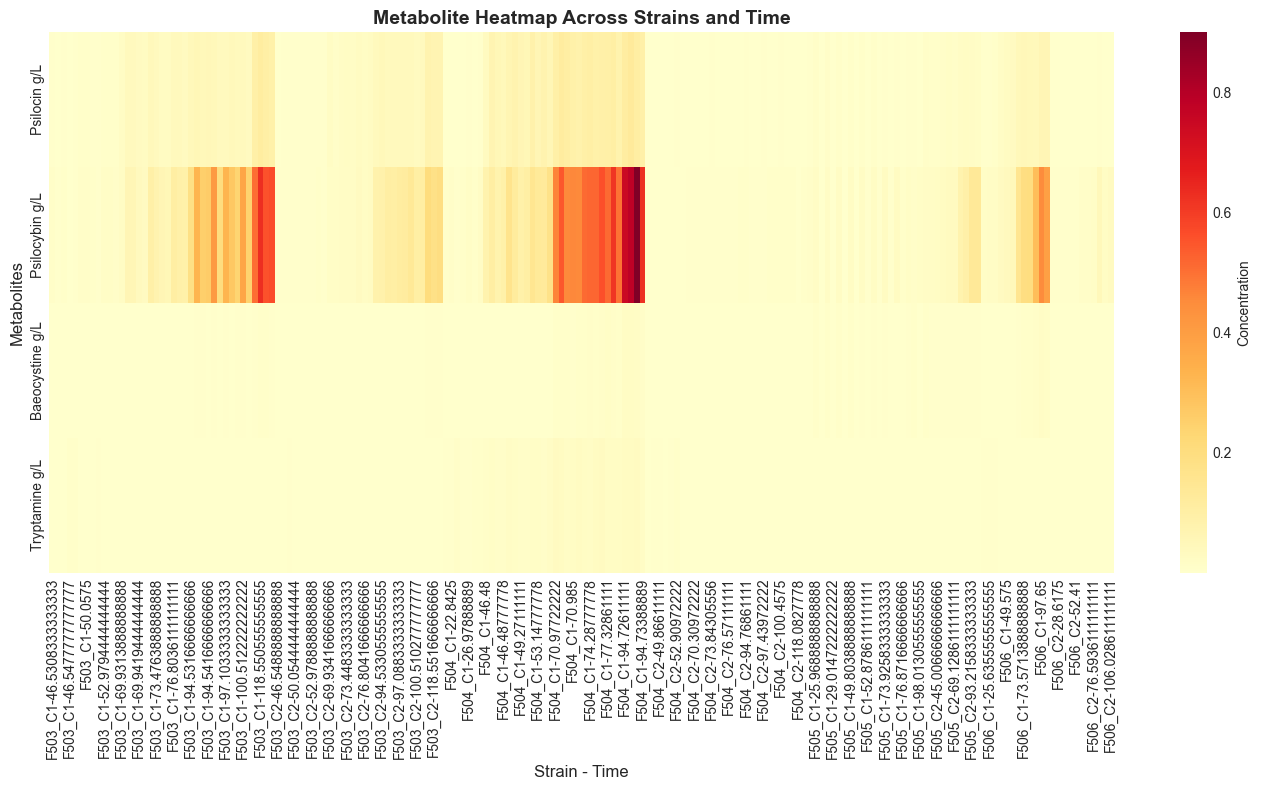

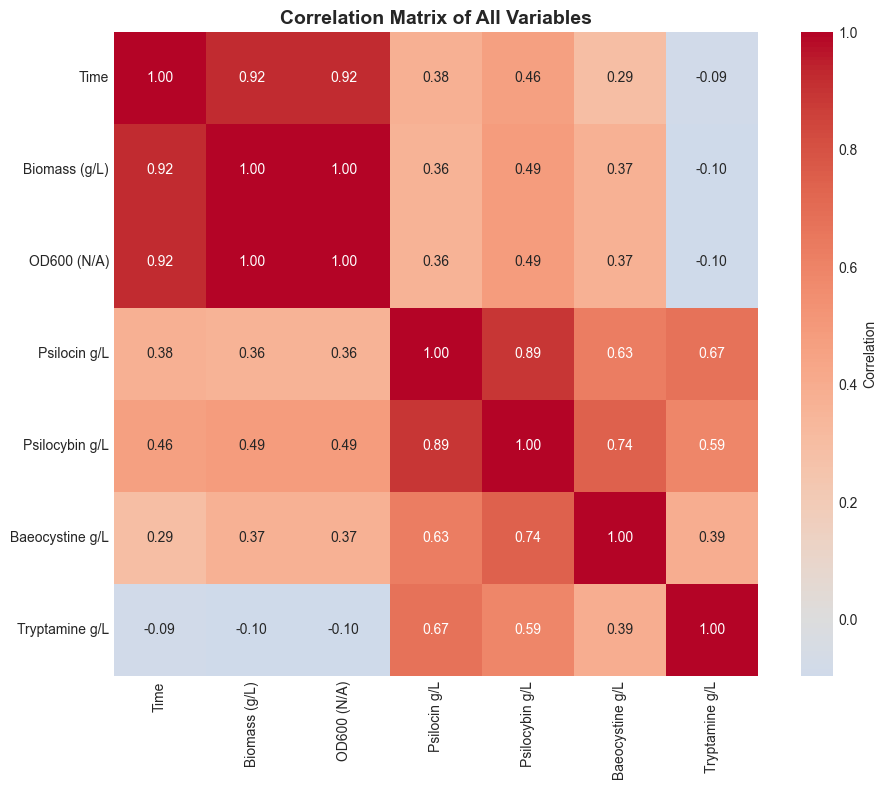


Top correlations with Psilocybin:
Psilocybin g/L     1.000000
Psilocin g/L       0.890559
Baeocystine g/L    0.744627
Tryptamine g/L     0.593166
Biomass (g/L)      0.489092
OD600 (N/A)        0.489069
Time               0.463861
Name: Psilocybin g/L, dtype: float64

SECTION 2: RANDOM FOREST FEATURE IMPORTANCE
⚠️ Dropping 2 rows with missing Psilocybin g/L values.

Features used: ['Time', 'Biomass (g/L)', 'OD600 (N/A)', 'Psilocin g/L', 'Baeocystine g/L', 'Tryptamine g/L']
Samples: 281

Random Forest Performance:
Mean RMSE (5-fold CV): 0.0632 (+/- 0.0289)
R² Score on full data: 0.9942

Feature Importance Ranking:
           Feature  Importance
3     Psilocin g/L    0.818814
4  Baeocystine g/L    0.121157
0             Time    0.027223
5   Tryptamine g/L    0.020425
1    Biomass (g/L)    0.006376
2      OD600 (N/A)    0.006006


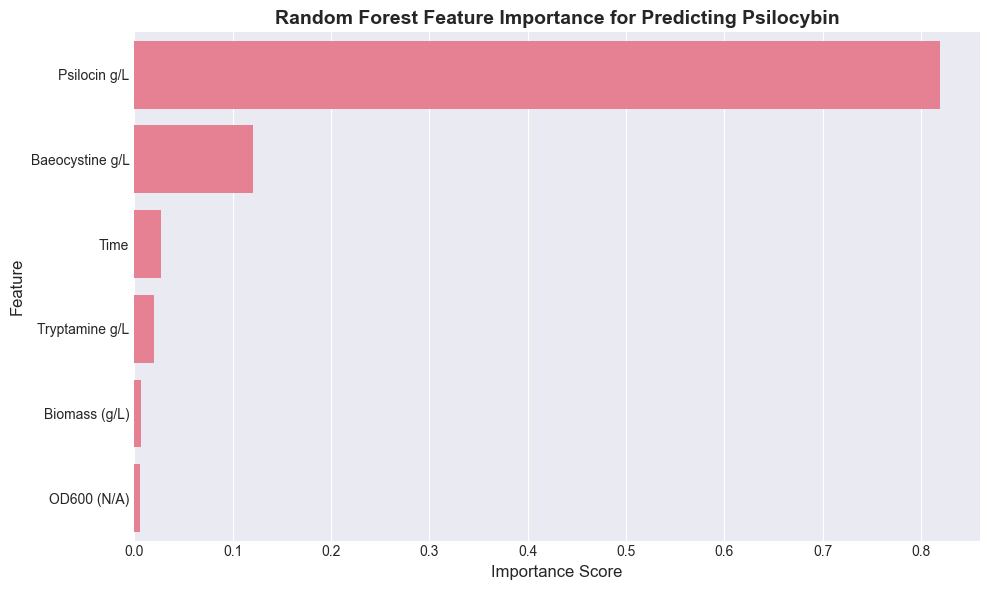

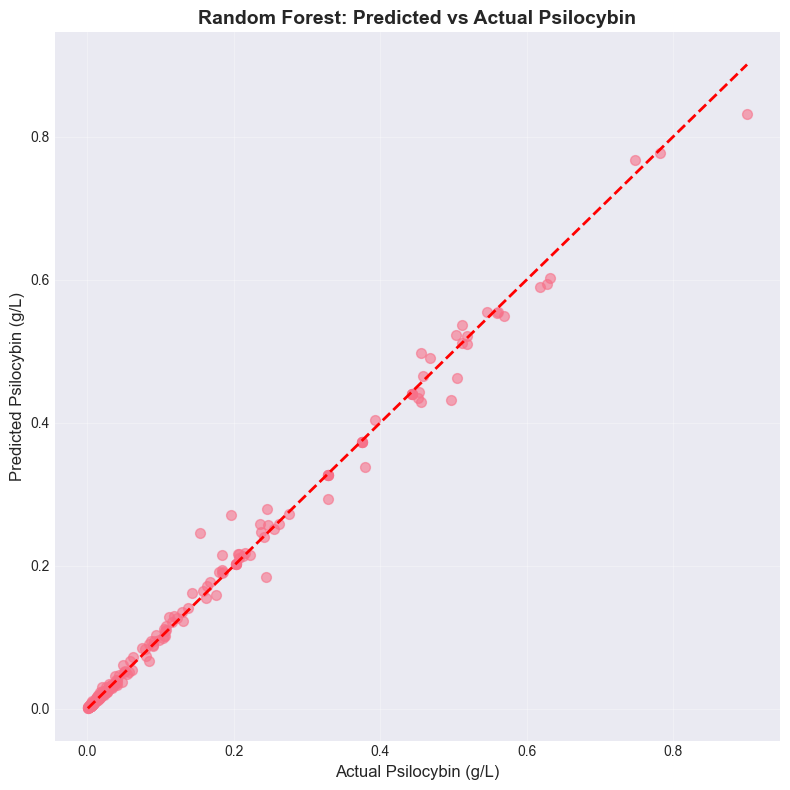


SECTION 3: GAUSSIAN PROCESS REGRESSION

F503_C1 - GP Model Score: 0.8882

F503_C2 - GP Model Score: 0.9840

F504_C1 - GP Model Score: 0.9738

F504_C2 - GP Model Score: 0.6355

F505_C1 - GP Model Score: -0.0003

F505_C2 - GP Model Score: 0.2688

F506_C1 - GP Model Score: 0.7451

F506_C2 - GP Model Score: 0.6446


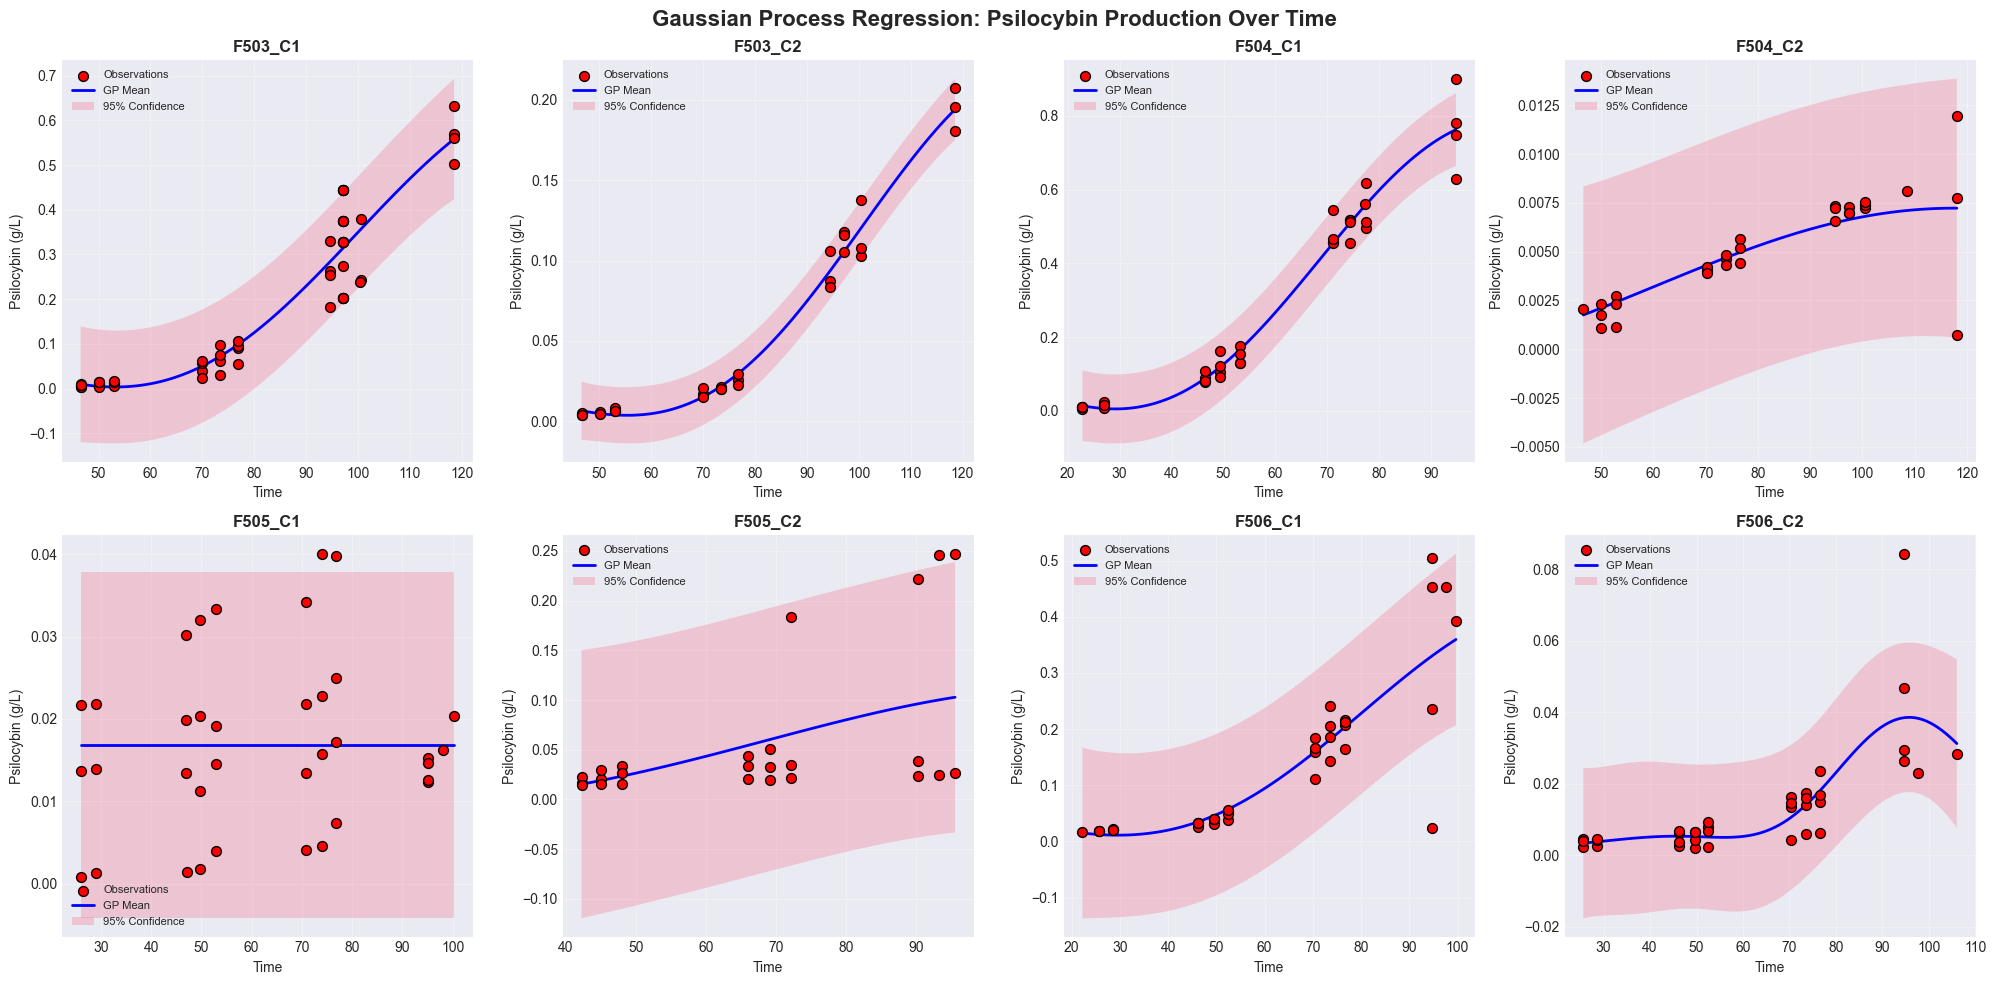


SECTION 4: PCA & CLUSTERING ANALYSIS

Explained Variance Ratio:
PC1: 0.6090 (60.90%)
PC2: 0.2896 (28.96%)
PC3: 0.0581 (5.81%)
PC4: 0.0320 (3.20%)
PC5: 0.0113 (1.13%)
Cumulative variance (first 3 PCs): 95.67%


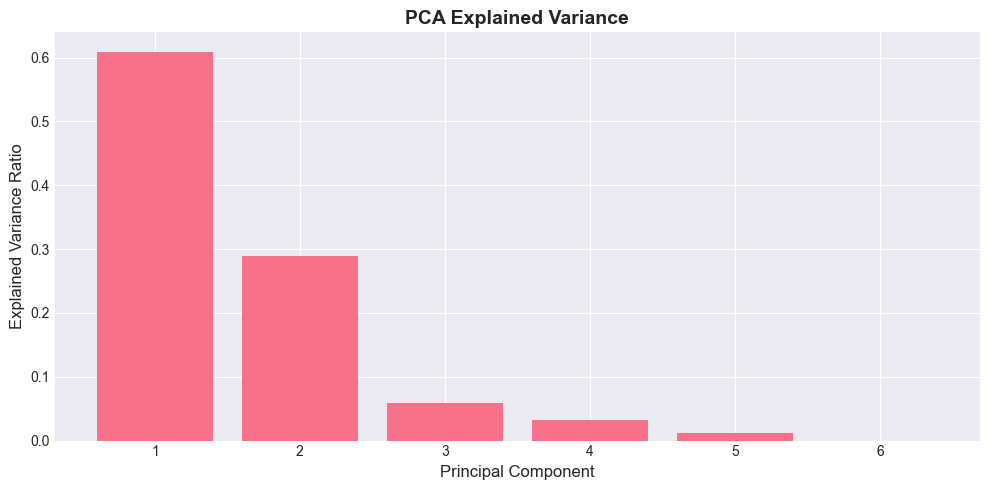

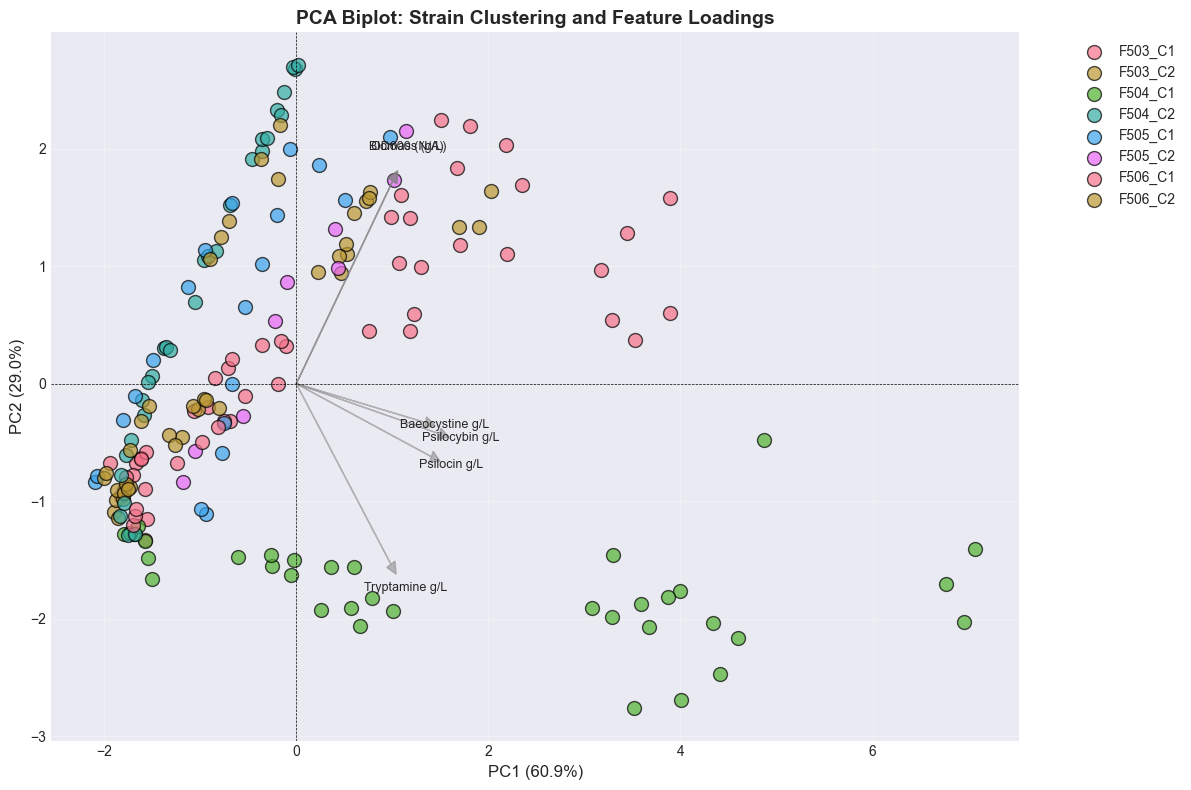


Feature Loadings on PC1 and PC2:
                   PC1    PC2
Biomass (g/L)    0.335  0.575
OD600 (N/A)      0.335  0.575
Psilocin g/L     0.469 -0.207
Psilocybin g/L   0.497 -0.142
Baeocystine g/L  0.448 -0.110
Tryptamine g/L   0.328 -0.512


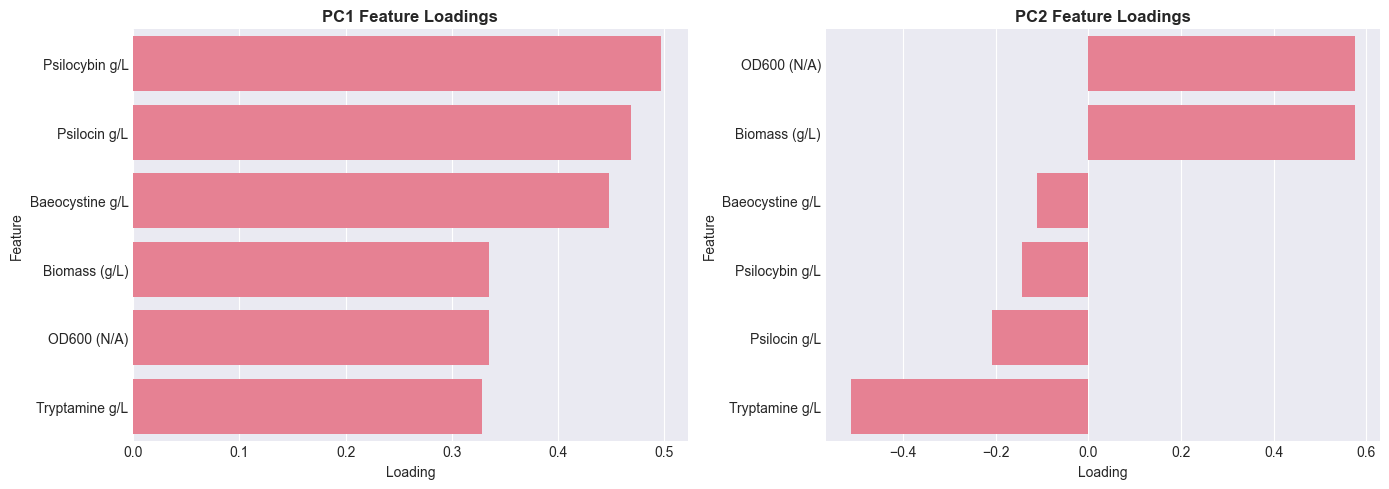


KEY INSIGHTS SUMMARY

1. STRAIN PERFORMANCE:
----------------------------------------
   • Best performing strain: F504_C1
   • Maximum psilocybin achieved: 0.901 g/L
   • Most consistent strain: F504_C2 (lowest variability)

2. METABOLITE PROXIES (Random Forest):
----------------------------------------
   Top 3 predictive metabolites:
   • Psilocin g/L: 0.8188
   • Baeocystine g/L: 0.1212
   • Time: 0.0272

   Model Performance: R² = 0.9942
   → These metabolites can serve as early indicators of psilocybin production

3. TIME-SERIES PATTERNS:
----------------------------------------
   • Gaussian Process models show production dynamics with uncertainty
   • Can be used for: trajectory prediction, optimization timing, anomaly detection

4. STRAIN CLUSTERING (PCA):
----------------------------------------
   • First 3 PCs explain 95.7% of variance
   • Strains cluster based on metabolic profiles
   • Key discriminating features:
     - Psilocybin g/L: 0.497
     - Psilocin g/L: 0.469


In [21]:
# Yarrowia Strain Machine Learning Analysis
# Psilocybin Production Analysis across Different Strains

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel, WhiteKernel
import warnings
warnings.filterwarnings('ignore')

# Set style for better-looking plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Load the data
df = pd.read_excel('../data/subs_omics_data/mltest.xlsx')
df = df.rename(columns={"Hours":"Time"})

print("Data loaded successfully!")
print(f"Shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nFirst few rows:")
print(df.head())

# ============================================================================
# SECTION 1: DATA EXPLORATION & VISUALIZATION
# ============================================================================

print("\n" + "="*80)
print("SECTION 1: EXPLORATORY DATA ANALYSIS")
print("="*80)

# Extract strain information (remove replicate info)
df['Strain'] = df['SampleID'].str.extract(r'(F\d+_C\d+)', flags=re.IGNORECASE)[0]
df['Replicate'] = df['SampleID'].str.extract(r'R(\d+)')[0].astype(float)

print("\nUnique Strains:", df['Strain'].unique())
print("Replicates per condition:", df.groupby('Strain')['Replicate'].nunique())

# 1.1 Psilocybin Production Over Time by Strain
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle('Psilocybin Production Over Time by Strain', fontsize=16, fontweight='bold')

strains = sorted(df['Strain'].unique(), key=lambda x: x.upper())
for idx, strain in enumerate(strains):
    ax = axes[idx // 4, idx % 4]
    strain_data = df[df['Strain'] == strain]
    
    for rep in strain_data['Replicate'].unique():
        rep_data = strain_data[strain_data['Replicate'] == rep]
        ax.plot(rep_data['Time'], rep_data['Psilocybin g/L'], 
                marker='o', label=f'R{int(rep)}', alpha=0.7, linewidth=2)
    
    ax.set_xlabel('Time', fontsize=10)
    ax.set_ylabel('Psilocybin (g/L)', fontsize=10)
    ax.set_title(strain, fontsize=12, fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('psilocybin_timeseries.png', dpi=300, bbox_inches='tight')
plt.show()

# 1.2 Summary Statistics by Strain
print("\nPsilocybin Production Summary by Strain:")
psilocybin_summary = df.groupby('Strain')['Psilocybin g/L'].agg([
    ('Mean', 'mean'),
    ('Std', 'std'),
    ('Max', 'max'),
    ('Min', 'min')
]).round(3)
print(psilocybin_summary.sort_values('Max', ascending=False))

# 1.3 Maximum Psilocybin by Strain
fig, ax = plt.subplots(figsize=(12, 6))
max_psilocybin = df.groupby('Strain')['Psilocybin g/L'].max().sort_values(ascending=False)
ax.bar(max_psilocybin.index, max_psilocybin.values, color='steelblue', edgecolor='black', alpha=0.7)
ax.set_xlabel('Strain', fontsize=12)
ax.set_ylabel('Maximum Psilocybin (g/L)', fontsize=12)
ax.set_title('Maximum Psilocybin Production by Strain', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
# Add value labels on bars
for i, (strain, val) in enumerate(max_psilocybin.items()):
    ax.text(i, val + 0.02, f'{val:.3f}', ha='center', fontsize=10, fontweight='bold')
plt.tight_layout()
plt.savefig('psilocybin_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

# 1.4 Heatmap of all metabolites
# Get numeric columns (excluding SampleID, Strain, Replicate)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'Replicate' in numeric_cols:
    numeric_cols.remove('Replicate')

# For heatmap, only show metabolite concentrations (exclude Time, Biomass, OD600)
metabolite_cols = [col for col in numeric_cols if col not in ['Time', 'Biomass (g/L)', 'OD600 (N/A)']]

# Average by strain and time
heatmap_data = df.groupby(['Strain', 'Time'])[metabolite_cols].mean()

fig, ax = plt.subplots(figsize=(14, 8))
sns.heatmap(heatmap_data.T, cmap='YlOrRd', annot=False, fmt='.2f', 
            cbar_kws={'label': 'Concentration'}, ax=ax)
ax.set_title('Metabolite Heatmap Across Strains and Time', fontsize=14, fontweight='bold')
ax.set_xlabel('Strain - Time', fontsize=12)
ax.set_ylabel('Metabolites', fontsize=12)
plt.tight_layout()
plt.savefig('metabolite_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# 1.5 Correlation Matrix
fig, ax = plt.subplots(figsize=(10, 8))
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, ax=ax, cbar_kws={'label': 'Correlation'})
ax.set_title('Correlation Matrix of All Variables', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nTop correlations with Psilocybin:")
psilocybin_corr = correlation_matrix['Psilocybin g/L'].sort_values(ascending=False)
print(psilocybin_corr)

# ============================================================================
# SECTION 2: RANDOM FOREST FEATURE IMPORTANCE ANALYSIS
# ============================================================================

print("\n" + "="*80)
print("SECTION 2: RANDOM FOREST FEATURE IMPORTANCE")
print("="*80)

# Prepare data for Random Forest
feature_cols = [col for col in numeric_cols if col != 'Psilocybin g/L']

# Drop rows with missing Psilocybin values (target)
missing_before = df['Psilocybin g/L'].isna().sum()
if missing_before > 0:
    print(f"⚠️ Dropping {missing_before} rows with missing Psilocybin g/L values.")
    df = df.dropna(subset=['Psilocybin g/L'])

# Fill missing values in features
X = df[feature_cols].fillna(df[feature_cols].mean())
y = df['Psilocybin g/L']


print(f"\nFeatures used: {feature_cols}")
print(f"Samples: {len(X)}")

# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=200, max_depth=10, 
                                  random_state=42, n_jobs=-1)
rf_model.fit(X, y)

# Cross-validation score
cv_scores = cross_val_score(rf_model, X, y, cv=5, 
                            scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-cv_scores)

print(f"\nRandom Forest Performance:")
print(f"Mean RMSE (5-fold CV): {rmse_scores.mean():.4f} (+/- {rmse_scores.std():.4f})")
print(f"R² Score on full data: {rf_model.score(X, y):.4f}")

# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance Ranking:")
print(feature_importance)

# Plot Feature Importance
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Importance', y='Feature', ax=ax)
ax.set_title('Random Forest Feature Importance for Predicting Psilocybin', 
             fontsize=14, fontweight='bold')
ax.set_xlabel('Importance Score', fontsize=12)
ax.set_ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.savefig('rf_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

# Predicted vs Actual
y_pred = rf_model.predict(X)
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(y, y_pred, alpha=0.6, s=50)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
ax.set_xlabel('Actual Psilocybin (g/L)', fontsize=12)
ax.set_ylabel('Predicted Psilocybin (g/L)', fontsize=12)
ax.set_title('Random Forest: Predicted vs Actual Psilocybin', 
             fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('rf_pred_vs_actual.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# SECTION 3: GAUSSIAN PROCESS REGRESSION FOR TIME SERIES
# ============================================================================

print("\n" + "="*80)
print("SECTION 3: GAUSSIAN PROCESS REGRESSION")
print("="*80)

# GP for each strain
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle('Gaussian Process Regression: Psilocybin Production Over Time', 
             fontsize=16, fontweight='bold')

for idx, strain in enumerate(strains):
    ax = axes[idx // 4, idx % 4]
    strain_data = df[df['Strain'] == strain].copy()
    
    # Prepare data
    X_train = strain_data[['Time']].values
    y_train = strain_data['Psilocybin g/L'].values
    
    # Create time points for prediction
    X_pred = np.linspace(X_train.min(), X_train.max(), 100).reshape(-1, 1)
    
    # Define kernel
    kernel = ConstantKernel(1.0) * RBF(length_scale=10.0) + WhiteKernel(noise_level=0.1)
    
    # Train GP
    gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, 
                                   random_state=42)
    gp.fit(X_train, y_train)
    
    # Predict
    y_pred, sigma = gp.predict(X_pred, return_std=True)
    
    # Plot
    ax.scatter(X_train, y_train, c='red', s=50, zorder=10, 
               edgecolors='black', label='Observations')
    ax.plot(X_pred, y_pred, 'b-', lw=2, label='GP Mean')
    ax.fill_between(X_pred.ravel(), 
                    y_pred - 1.96 * sigma, 
                    y_pred + 1.96 * sigma,
                    alpha=0.3, label='95% Confidence')
    
    ax.set_xlabel('Time', fontsize=10)
    ax.set_ylabel('Psilocybin (g/L)', fontsize=10)
    ax.set_title(strain, fontsize=12, fontweight='bold')
    ax.legend(loc='best', fontsize=8)
    ax.grid(True, alpha=0.3)
    
    print(f"\n{strain} - GP Model Score: {gp.score(X_train, y_train):.4f}")

plt.tight_layout()
plt.savefig('gp_regression.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# SECTION 4: PCA & CLUSTERING ANALYSIS
# ============================================================================

print("\n" + "="*80)
print("SECTION 4: PCA & CLUSTERING ANALYSIS")
print("="*80)

# Clean up numeric_cols before PCA (avoid duplicating group keys)
numeric_cols = [col for col in numeric_cols if col not in ['Time', 'Strain']]

# Average replicates for cleaner PCA
pca_data = df.groupby(['Strain', 'Time'])[numeric_cols].mean().reset_index()

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(pca_data[numeric_cols])

# PCA
pca = PCA(n_components=min(len(numeric_cols), len(pca_data)))
X_pca = pca.fit_transform(X_scaled)

# Explained variance
print("\nExplained Variance Ratio:")
for i, var in enumerate(pca.explained_variance_ratio_[:5]):
    print(f"PC{i+1}: {var:.4f} ({var*100:.2f}%)")
print(f"Cumulative variance (first 3 PCs): {pca.explained_variance_ratio_[:3].sum()*100:.2f}%")

# Plot explained variance
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(range(1, len(pca.explained_variance_ratio_)+1), 
       pca.explained_variance_ratio_)
ax.set_xlabel('Principal Component', fontsize=12)
ax.set_ylabel('Explained Variance Ratio', fontsize=12)
ax.set_title('PCA Explained Variance', fontsize=14, fontweight='bold')
ax.set_xticks(range(1, len(pca.explained_variance_ratio_)+1))
plt.tight_layout()
plt.savefig('pca_variance.png', dpi=300, bbox_inches='tight')
plt.show()

# PCA Biplot (PC1 vs PC2)
fig, ax = plt.subplots(figsize=(12, 8))

# Plot points colored by strain
for strain in pca_data['Strain'].unique():
    mask = pca_data['Strain'] == strain
    ax.scatter(X_pca[mask, 0], X_pca[mask, 1], 
              label=strain, s=100, alpha=0.7, edgecolors='black')

# Add feature vectors
loading_scale = 3
for i, feature in enumerate(numeric_cols):
    ax.arrow(0, 0, 
            pca.components_[0, i] * loading_scale,
            pca.components_[1, i] * loading_scale,
            head_width=0.1, head_length=0.1, fc='gray', ec='gray', alpha=0.5)
    ax.text(pca.components_[0, i] * loading_scale * 1.15,
           pca.components_[1, i] * loading_scale * 1.15,
           feature, fontsize=9, ha='center')

ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)', fontsize=12)
ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)', fontsize=12)
ax.set_title('PCA Biplot: Strain Clustering and Feature Loadings', 
            fontsize=14, fontweight='bold')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, alpha=0.3)
ax.axhline(y=0, color='k', linestyle='--', linewidth=0.5)
ax.axvline(x=0, color='k', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig('pca_biplot.png', dpi=300, bbox_inches='tight')
plt.show()

# Feature loadings for PC1 and PC2
loadings = pd.DataFrame(
    pca.components_[:2].T,
    columns=['PC1', 'PC2'],
    index=numeric_cols
)
print("\nFeature Loadings on PC1 and PC2:")
print(loadings.round(3))

# Plot loadings
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for idx, pc in enumerate(['PC1', 'PC2']):
    loadings_sorted = loadings[pc].sort_values(ascending=False)
    sns.barplot(x=loadings_sorted.values, y=loadings_sorted.index, ax=axes[idx])
    axes[idx].set_title(f'{pc} Feature Loadings', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Loading', fontsize=10)
    axes[idx].set_ylabel('Feature', fontsize=10)

plt.tight_layout()
plt.savefig('pca_loadings.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# SECTION 5: KEY INSIGHTS SUMMARY
# ============================================================================

print("\n" + "="*80)
print("KEY INSIGHTS SUMMARY")
print("="*80)

print("\n1. STRAIN PERFORMANCE:")
print("-" * 40)
best_strain = psilocybin_summary.idxmax()['Max']
print(f"   • Best performing strain: {best_strain}")
print(f"   • Maximum psilocybin achieved: {psilocybin_summary.loc[best_strain, 'Max']:.3f} g/L")
print(f"   • Most consistent strain: {psilocybin_summary['Std'].idxmin()} (lowest variability)")

print("\n2. METABOLITE PROXIES (Random Forest):")
print("-" * 40)
top_features = feature_importance.head(3)
print("   Top 3 predictive metabolites:")
for _, row in top_features.iterrows():
    print(f"   • {row['Feature']}: {row['Importance']:.4f}")
print(f"\n   Model Performance: R² = {rf_model.score(X, y):.4f}")
print("   → These metabolites can serve as early indicators of psilocybin production")

print("\n3. TIME-SERIES PATTERNS:")
print("-" * 40)
print("   • Gaussian Process models show production dynamics with uncertainty")
print("   • Can be used for: trajectory prediction, optimization timing, anomaly detection")

print("\n4. STRAIN CLUSTERING (PCA):")
print("-" * 40)
print(f"   • First 3 PCs explain {pca.explained_variance_ratio_[:3].sum()*100:.1f}% of variance")
print("   • Strains cluster based on metabolic profiles")
print("   • Key discriminating features:")
pc1_top = loadings['PC1'].abs().sort_values(ascending=False).head(2)
for feature, loading in pc1_top.items():
    print(f"     - {feature}: {loading:.3f}")

print("\n" + "="*80)
print("ANALYSIS COMPLETE - All figures saved!")
print("="*80)



SECTION 2B: MAXIMUM YIELD PREDICTION (GENETIC FEATURES ONLY)
Predicting maximum production capacity based solely on genetic profile
✓ Using 'Baeocystine g/L' for Baeocystin analysis

--------------------------------------------------------------------------------
Creating maximum yield dataset...
--------------------------------------------------------------------------------

Maximum yield dataset created:
  Strains: 8

Dataset preview:
    Strain  ylAro1  ylAro2  ylAro4  ylTrp2  PcCpr  Max_Psilocybin  \
2  F504_C1       1       1       1       1      0        0.900985   
0  F503_C1       0       0       0       0      0        0.631882   
6  F506_C1       1       1       0       0      0        0.504542   
5  F505_C2       1       1       0       0      1        0.247336   
1  F503_C2       0       0       1       1      0        0.207315   
7  F506_C2       1       1       1       1      1        0.084427   
4  F505_C1       0       0       1       1      1        0.040065   
3  F5

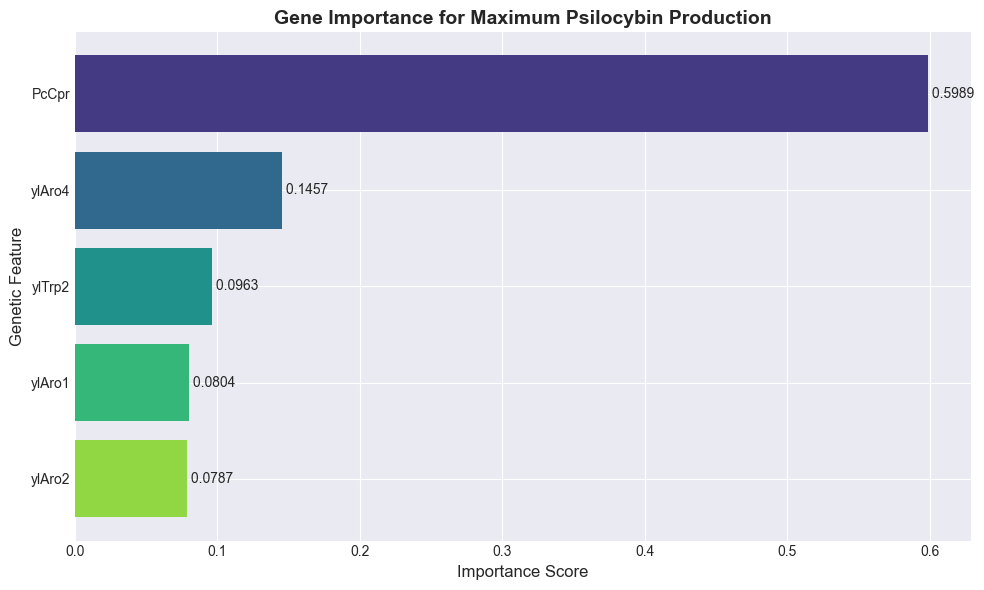

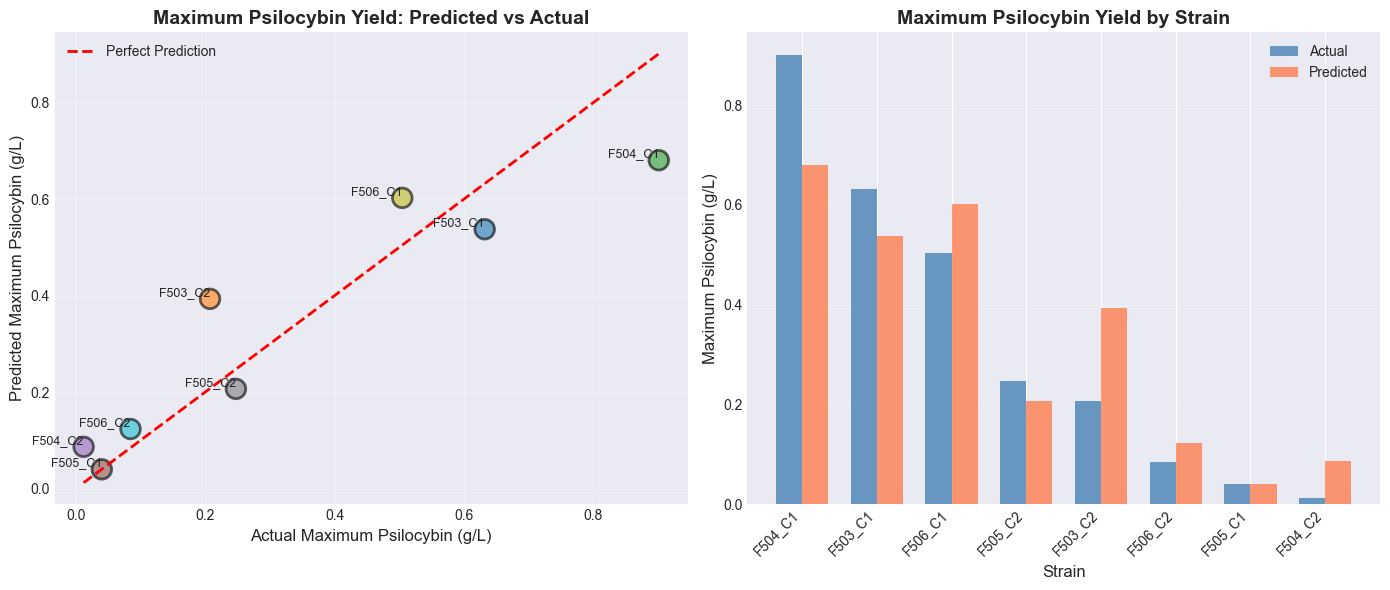


--------------------------------------------------------------------------------
GENETIC COMBINATION RANKING FOR Psilocybin
--------------------------------------------------------------------------------

Ranking by actual maximum Psilocybin yield:
 ylAro1  ylAro2  ylAro4  ylTrp2  PcCpr  Max_Psilocybin  Strain  Predicted    Error
      1       1       1       1      0        0.900985 F504_C1   0.680369 0.220616
      0       0       0       0      0        0.631882 F503_C1   0.537326 0.094556
      1       1       0       0      0        0.504542 F506_C1   0.602301 0.097758
      1       1       0       0      1        0.247336 F505_C2   0.206494 0.040842
      0       0       1       1      0        0.207315 F503_C2   0.393033 0.185717
      1       1       1       1      1        0.084427 F506_C2   0.123329 0.038902
      0       0       1       1      1        0.040065 F505_C1   0.039771 0.000293
      0       0       0       0      1        0.011967 F504_C2   0.086423 0.074457

-

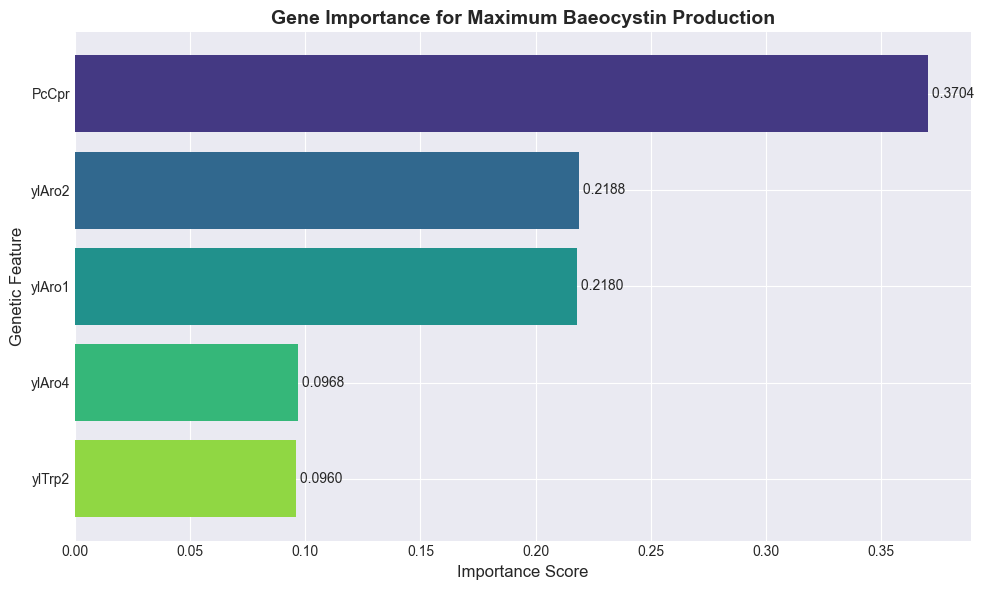

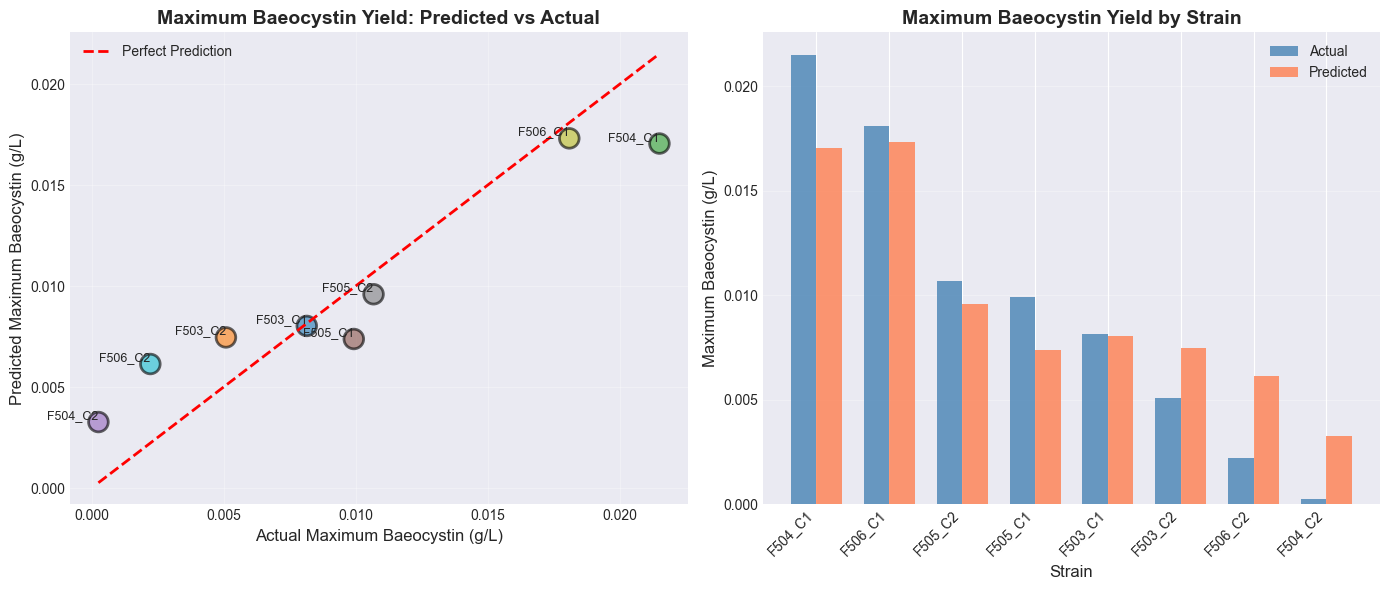


--------------------------------------------------------------------------------
GENETIC COMBINATION RANKING FOR Baeocystin
--------------------------------------------------------------------------------

Ranking by actual maximum Baeocystin yield:
 ylAro1  ylAro2  ylAro4  ylTrp2  PcCpr  Max_Baeocystin  Strain  Predicted    Error
      1       1       1       1      0        0.021500 F504_C1   0.017056 0.004444
      1       1       0       0      0        0.018087 F506_C1   0.017313 0.000774
      1       1       0       0      1        0.010677 F505_C2   0.009595 0.001083
      0       0       1       1      1        0.009930 F505_C1   0.007379 0.002551
      0       0       0       0      0        0.008149 F503_C1   0.008026 0.000123
      0       0       1       1      0        0.005089 F503_C2   0.007458 0.002369
      1       1       1       1      1        0.002227 F506_C2   0.006141 0.003914
      0       0       0       0      1        0.000262 F504_C2   0.003267 0.003005

-

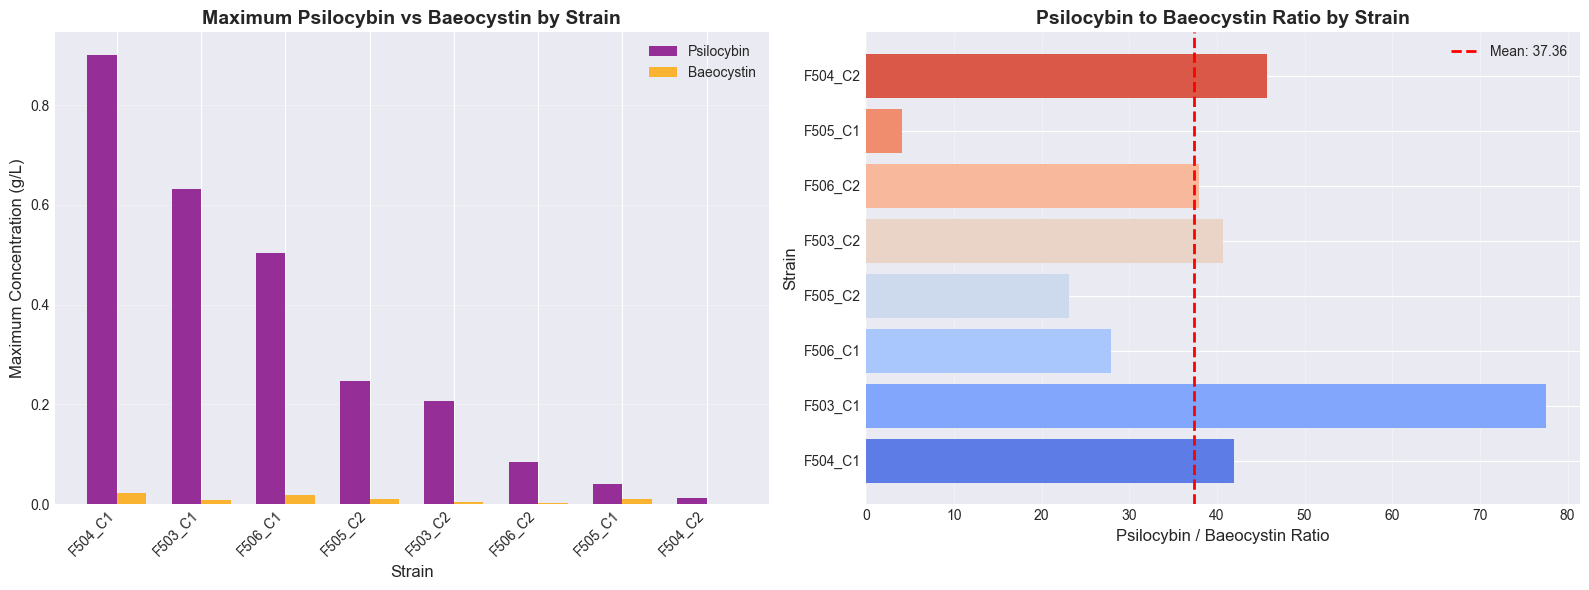


Summary statistics:
 Strain  Max_Psilocybin  Max_Baeocystin     Ratio
F504_C1        0.900985        0.021500 41.905728
F503_C1        0.631882        0.008149 77.539582
F506_C1        0.504542        0.018087 27.894967
F505_C2        0.247336        0.010677 23.164915
F503_C2        0.207315        0.005089 40.739777
F506_C2        0.084427        0.002227 37.914831
F505_C1        0.040065        0.009930  4.034722
F504_C2        0.011967        0.000262 45.679952


In [36]:
# ============================================================================
# SECTION 2B: RANDOM FOREST FOR MAXIMUM YIELD PREDICTION (GENETIC FEATURES ONLY)
# ============================================================================

print("\n" + "="*80)
print("SECTION 2B: MAXIMUM YIELD PREDICTION (GENETIC FEATURES ONLY)")
print("="*80)
print("Predicting maximum production capacity based solely on genetic profile")
print("="*80)

# Define genetic features for each strain
genetic_features = {
    'F503_C1': {'ylAro1': 0, 'ylAro2': 0, 'ylAro4': 0, 'ylTrp2': 0, 'PcCpr': 0},
    'F506_C1': {'ylAro1': 1, 'ylAro2': 1, 'ylAro4': 0, 'ylTrp2': 0, 'PcCpr': 0},
    'F503_C2': {'ylAro1': 0, 'ylAro2': 0, 'ylAro4': 1, 'ylTrp2': 1, 'PcCpr': 0},
    'F504_C1': {'ylAro1': 1, 'ylAro2': 1, 'ylAro4': 1, 'ylTrp2': 1, 'PcCpr': 0},
    'F504_C2': {'ylAro1': 0, 'ylAro2': 0, 'ylAro4': 0, 'ylTrp2': 0, 'PcCpr': 1},
    'F505_C2': {'ylAro1': 1, 'ylAro2': 1, 'ylAro4': 0, 'ylTrp2': 0, 'PcCpr': 1},
    'F505_C1': {'ylAro1': 0, 'ylAro2': 0, 'ylAro4': 1, 'ylTrp2': 1, 'PcCpr': 1},
    'F506_C2': {'ylAro1': 1, 'ylAro2': 1, 'ylAro4': 1, 'ylTrp2': 1, 'PcCpr': 1}
}

genetic_feature_names = ['ylAro1', 'ylAro2', 'ylAro4', 'ylTrp2', 'PcCpr']

# Map genetic features
for gene in genetic_feature_names:
    df[gene] = df['Strain'].map(lambda x: genetic_features.get(x, {}).get(gene, 0))

# Look for baeocystin column
possible_baeocystin_cols = [col for col in df.columns if 'baeocystin' in col.lower() or 'baeo' in col.lower()]

# Set target compounds
target_compounds = {
    'Psilocybin': 'Psilocybin g/L',
}

if possible_baeocystin_cols:
    target_compounds['Baeocystin'] = possible_baeocystin_cols[0]
    print(f"✓ Using '{possible_baeocystin_cols[0]}' for Baeocystin analysis")

# ============================================================================
# Create maximum yield dataset
# ============================================================================

print("\n" + "-"*80)
print("Creating maximum yield dataset...")
print("-"*80)

# Calculate maximum yield per strain (across all timepoints and replicates)
max_yield_data = []

for strain in df['Strain'].unique():
    strain_data = df[df['Strain'] == strain]
    
    row = {'Strain': strain}
    
    # Add genetic features
    for gene in genetic_feature_names:
        row[gene] = genetic_features.get(strain, {}).get(gene, 0)
    
    # Add maximum yields for each compound
    for compound_name, target_col in target_compounds.items():
        if target_col in df.columns:
            max_val = strain_data[target_col].max()
            row[f'Max_{compound_name}'] = max_val
    
    max_yield_data.append(row)

df_max = pd.DataFrame(max_yield_data)

print(f"\nMaximum yield dataset created:")
print(f"  Strains: {len(df_max)}")
print(f"\nDataset preview:")
print(df_max.sort_values(f'Max_Psilocybin', ascending=False))

# ============================================================================
# Run analysis for each compound
# ============================================================================

for compound_name in target_compounds.keys():
    
    print("\n" + "="*80)
    print(f"ANALYZING MAXIMUM {compound_name.upper()} YIELD")
    print("="*80)
    
    target_col = f'Max_{compound_name}'
    
    if target_col not in df_max.columns:
        print(f"⚠️ Column '{target_col}' not found. Skipping {compound_name}.")
        continue
    
    # Prepare features and target
    X = df_max[genetic_feature_names]
    y = df_max[target_col]
    
    print(f"\nFeatures: {genetic_feature_names}")
    print(f"Samples: {len(X)} (one per strain)")
    print(f"Target range: {y.min():.4f} to {y.max():.4f} g/L")
    
    # Check if we have enough data for cross-validation
    n_samples = len(X)
    n_folds = min(5, n_samples)  # Use fewer folds if we have few samples
    
    if n_samples < 3:
        print(f"⚠️ Only {n_samples} samples - skipping cross-validation")
        continue
    
    print(f"\nNote: With only {n_samples} samples (strains), this is more of an exploratory analysis.")
    print("The model is essentially learning which specific gene combinations give high yields.")
    
    # Train Random Forest
    rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, 
                                      random_state=42, n_jobs=-1,
                                      min_samples_split=2, min_samples_leaf=1)
    rf_model.fit(X, y)
    
    # Cross-validation score (Leave-One-Out if very few samples)
    if n_samples <= 5:
        from sklearn.model_selection import LeaveOneOut
        print(f"\nUsing Leave-One-Out cross-validation (only {n_samples} samples)")
        loo = LeaveOneOut()
        cv_predictions = []
        cv_actuals = []
        for train_idx, test_idx in loo.split(X):
            X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
            y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
            temp_model = RandomForestRegressor(n_estimators=100, max_depth=5, 
                                               random_state=42, n_jobs=-1,
                                               min_samples_split=2, min_samples_leaf=1)
            temp_model.fit(X_train, y_train)
            cv_predictions.append(temp_model.predict(X_test)[0])
            cv_actuals.append(y_test.iloc[0])
        
        cv_predictions = np.array(cv_predictions)
        cv_actuals = np.array(cv_actuals)
        rmse_loo = np.sqrt(np.mean((cv_actuals - cv_predictions)**2))
        mae_loo = np.mean(np.abs(cv_actuals - cv_predictions))
        
        print(f"\nLeave-One-Out Cross-Validation Performance for {compound_name}:")
        print(f"RMSE: {rmse_loo:.4f}")
        print(f"MAE: {mae_loo:.4f}")
    else:
        cv_scores = cross_val_score(rf_model, X, y, cv=n_folds, 
                                    scoring='neg_mean_squared_error')
        rmse_scores = np.sqrt(-cv_scores)
        
        print(f"\nRandom Forest Performance for {compound_name}:")
        print(f"Mean RMSE ({n_folds}-fold CV): {rmse_scores.mean():.4f} (+/- {rmse_scores.std():.4f})")
    
    print(f"R² Score on full data: {rf_model.score(X, y):.4f}")
    print("(Note: R² on full data is optimistically biased with so few samples)")
    
    # Feature Importance
    feature_importance = pd.DataFrame({
        'Feature': genetic_feature_names,
        'Importance': rf_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    print(f"\nGenetic Feature Importance for Maximum {compound_name}:")
    print(feature_importance)
    
    # Plot Feature Importance
    fig, ax = plt.subplots(figsize=(10, 6))
    colors = sns.color_palette("viridis", len(feature_importance))
    bars = ax.barh(range(len(feature_importance)), feature_importance['Importance'], color=colors)
    ax.set_yticks(range(len(feature_importance)))
    ax.set_yticklabels(feature_importance['Feature'])
    ax.set_xlabel('Importance Score', fontsize=12)
    ax.set_ylabel('Genetic Feature', fontsize=12)
    ax.set_title(f'Gene Importance for Maximum {compound_name} Production', 
                 fontsize=14, fontweight='bold')
    ax.invert_yaxis()
    
    # Add value labels on bars
    for i, (idx, row) in enumerate(feature_importance.iterrows()):
        ax.text(row['Importance'], i, f" {row['Importance']:.4f}", 
                va='center', fontsize=10)
    
    plt.tight_layout()
    # plt.savefig(f'rf_max_yield_importance_{compound_name.lower()}.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Predicted vs Actual
    y_pred = rf_model.predict(X)
    residuals = y - y_pred
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # Plot 1: Predicted vs Actual with strain labels
    ax1 = axes[0]
    scatter = ax1.scatter(y, y_pred, s=200, alpha=0.6, 
                         c=range(len(df_max)), cmap='tab10',
                         edgecolors='black', linewidth=2)
    
    # Add strain labels to points
    for idx, row in df_max.iterrows():
        ax1.annotate(row['Strain'], (row[target_col], y_pred[idx]), 
                    fontsize=9, ha='right', va='bottom')
    
    ax1.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Perfect Prediction')
    ax1.set_xlabel(f'Actual Maximum {compound_name} (g/L)', fontsize=12)
    ax1.set_ylabel(f'Predicted Maximum {compound_name} (g/L)', fontsize=12)
    ax1.set_title(f'Maximum {compound_name} Yield: Predicted vs Actual', 
                 fontsize=14, fontweight='bold')
    ax1.grid(True, alpha=0.3)
    ax1.legend()
    
    # Plot 2: Bar chart of actual vs predicted
    ax2 = axes[1]
    x_pos = np.arange(len(df_max))
    width = 0.35
    
    df_max_sorted = df_max.sort_values(target_col, ascending=False)
    y_sorted = df_max_sorted[target_col].values
    y_pred_sorted = rf_model.predict(df_max_sorted[genetic_feature_names])
    
    ax2.bar(x_pos - width/2, y_sorted, width, label='Actual', alpha=0.8, color='steelblue')
    ax2.bar(x_pos + width/2, y_pred_sorted, width, label='Predicted', alpha=0.8, color='coral')
    
    ax2.set_xlabel('Strain', fontsize=12)
    ax2.set_ylabel(f'Maximum {compound_name} (g/L)', fontsize=12)
    ax2.set_title(f'Maximum {compound_name} Yield by Strain', fontsize=14, fontweight='bold')
    ax2.set_xticks(x_pos)
    ax2.set_xticklabels(df_max_sorted['Strain'], rotation=45, ha='right')
    ax2.legend()
    ax2.grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    # plt.savefig(f'rf_max_yield_comparison_{compound_name.lower()}.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Gene combination analysis
    print("\n" + "-"*80)
    print(f"GENETIC COMBINATION RANKING FOR {compound_name}")
    print("-"*80)
    
    # Create a detailed summary
    summary = df_max[genetic_feature_names + [target_col, 'Strain']].copy()
    summary['Predicted'] = y_pred
    summary['Error'] = np.abs(y - y_pred)
    summary = summary.sort_values(target_col, ascending=False)
    
    print(f"\nRanking by actual maximum {compound_name} yield:")
    print(summary.to_string(index=False))
    
    # Identify which genes are associated with high production
    print(f"\n" + "-"*80)
    print(f"GENE ASSOCIATION ANALYSIS")
    print("-"*80)
    
    median_yield = y.median()
    print(f"\nMedian maximum {compound_name} yield: {median_yield:.4f} g/L")
    
    for gene in genetic_feature_names:
        with_gene = df_max[df_max[gene] == 1][target_col].mean()
        without_gene = df_max[df_max[gene] == 0][target_col].mean()
        diff = with_gene - without_gene
        
        print(f"\n{gene}:")
        print(f"  With gene (1):    {with_gene:.4f} g/L (n={df_max[gene].sum()})")
        print(f"  Without gene (0): {without_gene:.4f} g/L (n={(~df_max[gene].astype(bool)).sum()})")
        print(f"  Difference:       {diff:+.4f} g/L {'✓ Beneficial' if diff > 0 else '✗ Detrimental'}")

# ============================================================================
# COMPARATIVE ANALYSIS (if both compounds exist)
# ============================================================================

if len(target_compounds) > 1 and all(f'Max_{c}' in df_max.columns for c in target_compounds.keys()):
    print("\n" + "="*80)
    print("COMPARATIVE ANALYSIS: MAXIMUM PSILOCYBIN vs BAEOCYSTIN")
    print("="*80)
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Plot 1: Side-by-side comparison
    ax1 = axes[0]
    x_pos = np.arange(len(df_max))
    width = 0.35
    
    df_max_sorted = df_max.sort_values('Max_Psilocybin', ascending=False)
    
    ax1.bar(x_pos - width/2, df_max_sorted['Max_Psilocybin'], width, 
           label='Psilocybin', alpha=0.8, color='purple')
    ax1.bar(x_pos + width/2, df_max_sorted['Max_Baeocystin'], width, 
           label='Baeocystin', alpha=0.8, color='orange')
    
    ax1.set_xlabel('Strain', fontsize=12)
    ax1.set_ylabel('Maximum Concentration (g/L)', fontsize=12)
    ax1.set_title('Maximum Psilocybin vs Baeocystin by Strain', fontsize=14, fontweight='bold')
    ax1.set_xticks(x_pos)
    ax1.set_xticklabels(df_max_sorted['Strain'], rotation=45, ha='right')
    ax1.legend()
    ax1.grid(True, alpha=0.3, axis='y')
    
    # Plot 2: Ratio plot
    ax2 = axes[1]
    df_max_sorted['Ratio'] = df_max_sorted['Max_Psilocybin'] / df_max_sorted['Max_Baeocystin']
    
    bars = ax2.barh(range(len(df_max_sorted)), df_max_sorted['Ratio'], 
                    color=sns.color_palette("coolwarm", len(df_max_sorted)))
    ax2.set_yticks(range(len(df_max_sorted)))
    ax2.set_yticklabels(df_max_sorted['Strain'])
    ax2.set_xlabel('Psilocybin / Baeocystin Ratio', fontsize=12)
    ax2.set_ylabel('Strain', fontsize=12)
    ax2.set_title('Psilocybin to Baeocystin Ratio by Strain', fontsize=14, fontweight='bold')
    ax2.axvline(x=df_max_sorted['Ratio'].mean(), color='red', linestyle='--', 
                linewidth=2, label=f'Mean: {df_max_sorted["Ratio"].mean():.2f}')
    ax2.legend()
    ax2.grid(True, alpha=0.3, axis='x')
    
    plt.tight_layout()
    # plt.savefig('max_yield_psilocybin_vs_baeocystin.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Print summary
    print("\nSummary statistics:")
    print(df_max_sorted[['Strain', 'Max_Psilocybin', 'Max_Baeocystin', 'Ratio']].to_string(index=False))


SECTION 2: RANDOM FOREST FEATURE IMPORTANCE (GENETIC FEATURES)

Genetic features mapped to strains successfully!

Genetic feature distribution:
     ylAro1  ylAro2  ylAro4  ylTrp2  PcCpr   Strain
0         0       0       0       0      0  F503_C1
52        0       0       1       1      0  F503_C2
82        1       1       1       1      0  F504_C1
118       0       0       0       0      1  F504_C2
147       0       0       1       1      1  F505_C1
183       1       1       0       0      1  F505_C2
210       1       1       0       0      0  F506_C1
247       1       1       1       1      1  F506_C2

DATA STRUCTURE CHECK

Total rows in dataframe: 281
Unique strains: 8
Samples per strain:
Strain
F503_C1    52
F503_C2    30
F504_C1    36
F504_C2    29
F505_C1    36
F505_C2    25
F506_C1    37
F506_C2    36
Name: count, dtype: int64

Possible baeocystin columns found: ['Baeocystine g/L']

Checking for Time column...
✓ Time column found: 'Time'
  Time range: 22.2297222222222 to 118.5

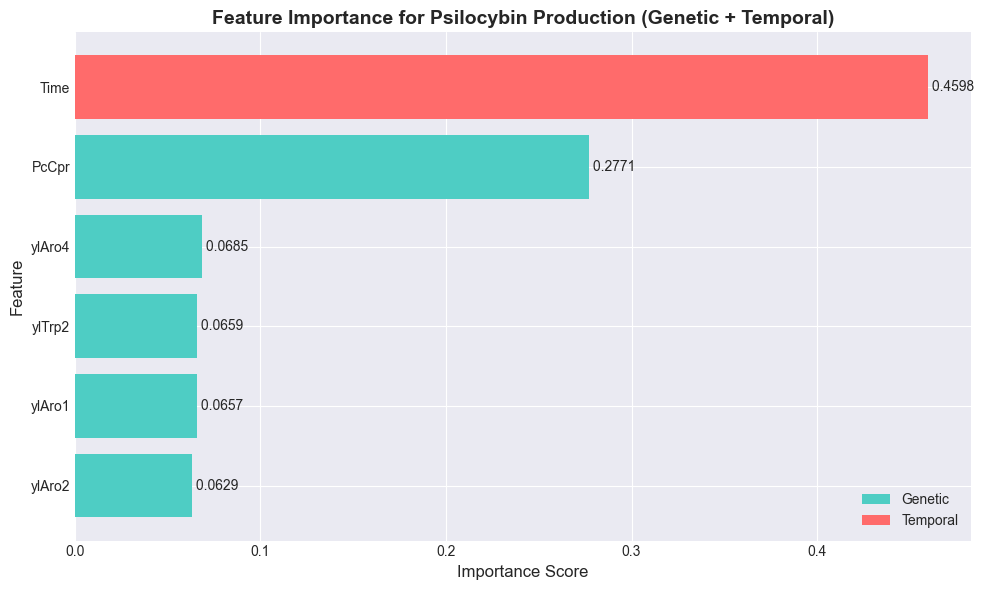

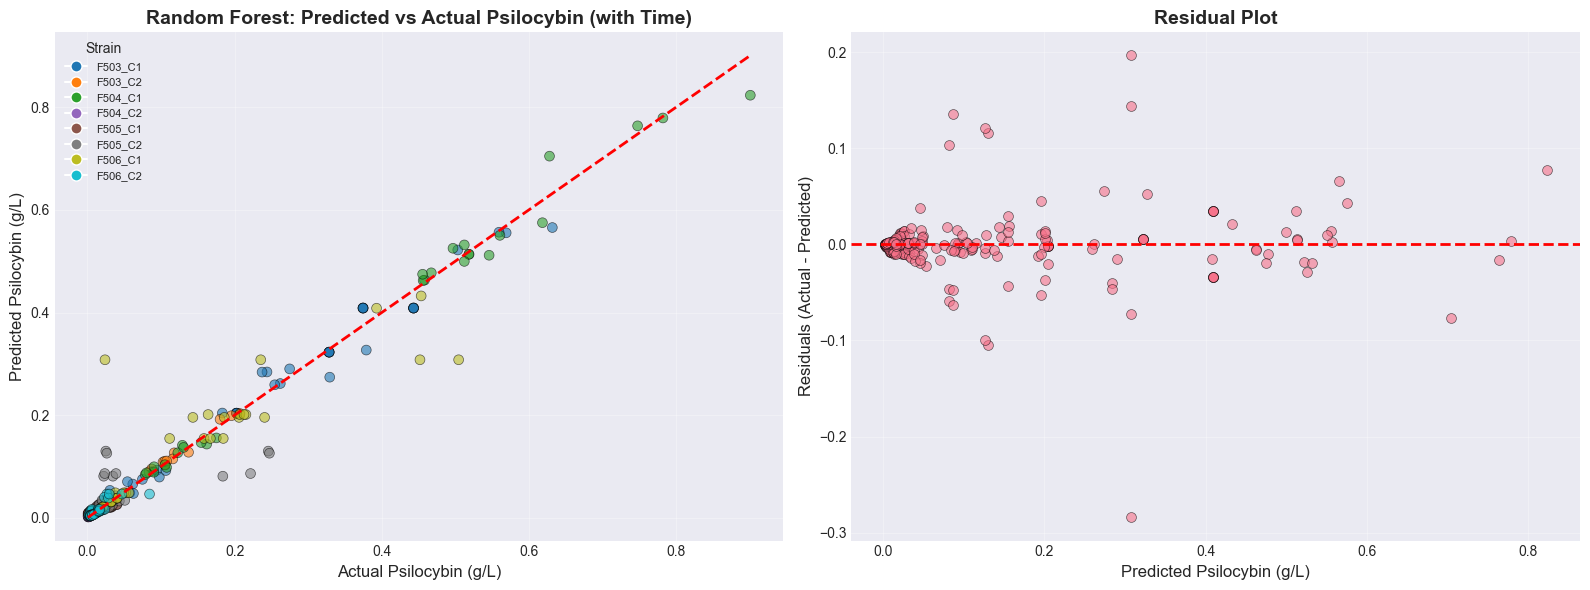


Prediction Performance by Strain for Psilocybin:
         Mean_Actual  Mean_Predicted    RMSE  Count
Strain                                             
F504_C1       0.2974          0.2968  0.0227   36.0
F503_C1       0.2064          0.2051  0.0226   52.0
F506_C1       0.1315          0.1320  0.0649   37.0
F503_C2       0.0596          0.0615  0.0044   30.0
F505_C2       0.0587          0.0562  0.0603   25.0
F505_C1       0.0170          0.0182  0.0074   36.0
F506_C2       0.0136          0.0145  0.0090   36.0
F504_C2       0.0051          0.0055  0.0012   29.0

--------------------------------------------------------------------------------
GENETIC COMBINATION ANALYSIS FOR Psilocybin (averaged across time)
--------------------------------------------------------------------------------

Psilocybin Production by Genetic Combination:
                                   Mean_Psilocybin  Std_Psilocybin  N_Samples  \
ylAro1 ylAro2 ylAro4 ylTrp2 PcCpr                                       

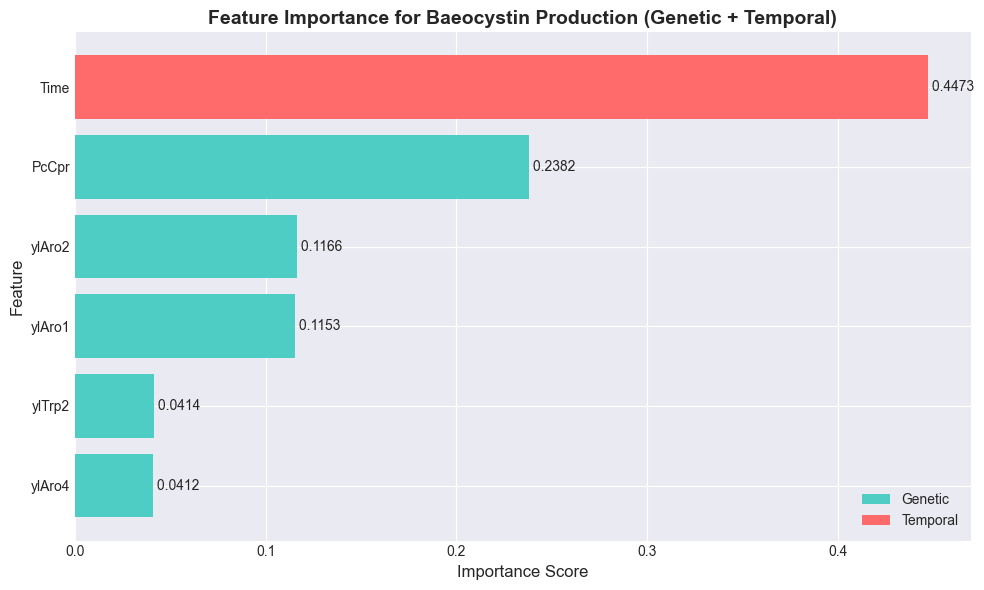

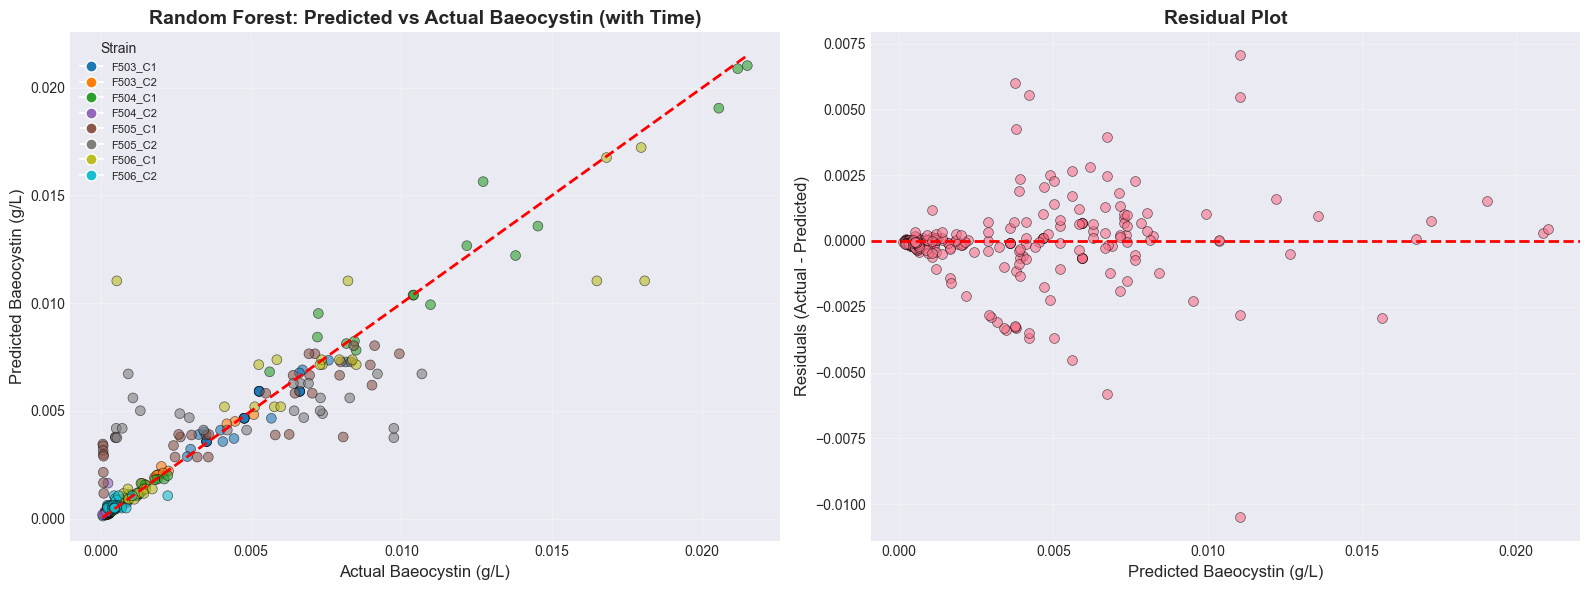


Prediction Performance by Strain for Baeocystin:
         Mean_Actual  Mean_Predicted    RMSE  Count
Strain                                             
F504_C1       0.0059          0.0060  0.0008   36.0
F505_C2       0.0051          0.0050  0.0031   25.0
F506_C1       0.0047          0.0047  0.0024   37.0
F505_C1       0.0046          0.0048  0.0019   36.0
F503_C1       0.0030          0.0029  0.0004   52.0
F503_C2       0.0012          0.0013  0.0001   30.0
F506_C2       0.0005          0.0006  0.0003   36.0
F504_C2       0.0002          0.0004  0.0003   29.0

--------------------------------------------------------------------------------
GENETIC COMBINATION ANALYSIS FOR Baeocystin (averaged across time)
--------------------------------------------------------------------------------

Baeocystin Production by Genetic Combination:
                                   Mean_Baeocystin  Std_Baeocystin  N_Samples  \
ylAro1 ylAro2 ylAro4 ylTrp2 PcCpr                                       

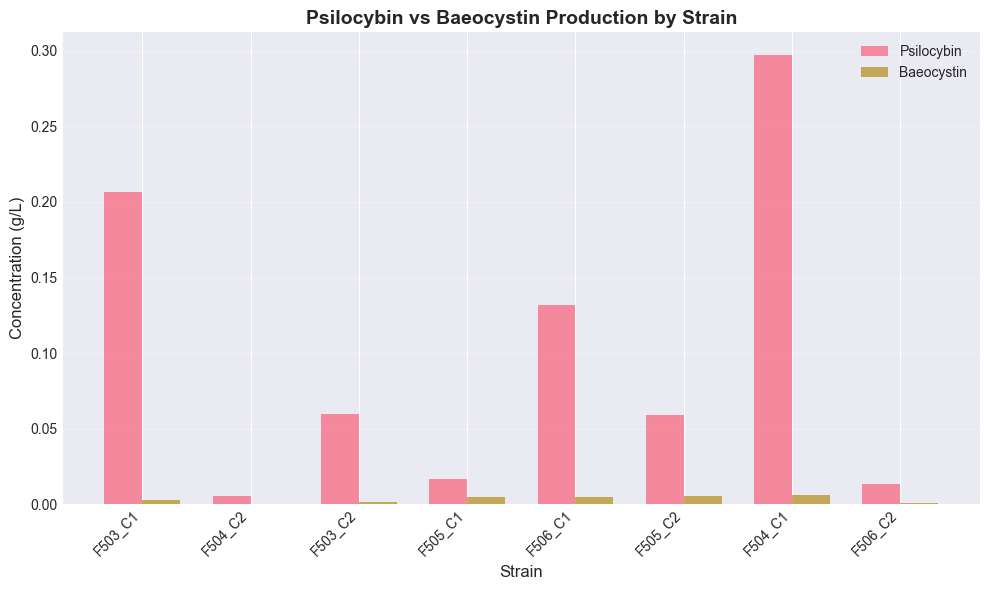

In [35]:
# ============================================================================
# SECTION 2: RANDOM FOREST FEATURE IMPORTANCE ANALYSIS (GENETIC FEATURES)
# ============================================================================

print("\n" + "="*80)
print("SECTION 2: RANDOM FOREST FEATURE IMPORTANCE (GENETIC FEATURES)")
print("="*80)

# Define genetic features for each strain based on the strain list image
# NOTE: Only using pathway optimization genes (CrTdc, PcPsiH, PcPsiK, PcPsiM are in all strains)
# 1 = gene present, 0 = gene absent
genetic_features = {
    'F503_C1': {'ylAro1': 0, 'ylAro2': 0, 'ylAro4': 0, 'ylTrp2': 0, 'PcCpr': 0},
    'F506_C1': {'ylAro1': 1, 'ylAro2': 1, 'ylAro4': 0, 'ylTrp2': 0, 'PcCpr': 0},
    'F503_C2': {'ylAro1': 0, 'ylAro2': 0, 'ylAro4': 1, 'ylTrp2': 1, 'PcCpr': 0},
    'F504_C1': {'ylAro1': 1, 'ylAro2': 1, 'ylAro4': 1, 'ylTrp2': 1, 'PcCpr': 0},
    'F504_C2': {'ylAro1': 0, 'ylAro2': 0, 'ylAro4': 0, 'ylTrp2': 0, 'PcCpr': 1},
    'F505_C2': {'ylAro1': 1, 'ylAro2': 1, 'ylAro4': 0, 'ylTrp2': 0, 'PcCpr': 1},
    'F505_C1': {'ylAro1': 0, 'ylAro2': 0, 'ylAro4': 1, 'ylTrp2': 1, 'PcCpr': 1},
    'F506_C2': {'ylAro1': 1, 'ylAro2': 1, 'ylAro4': 1, 'ylTrp2': 1, 'PcCpr': 1}
}

# Map genetic features to each row based on strain
genetic_feature_names = ['ylAro1', 'ylAro2', 'ylAro4', 'ylTrp2', 'PcCpr']

for gene in genetic_feature_names:
    df[gene] = df['Strain'].map(lambda x: genetic_features.get(x, {}).get(gene, 0))

print(f"\nGenetic features mapped to strains successfully!")
print(f"\nGenetic feature distribution:")
print(df[genetic_feature_names + ['Strain']].drop_duplicates('Strain').sort_values('Strain'))

# ============================================================================
# DEBUGGING: Check data structure
# ============================================================================
print("\n" + "="*80)
print("DATA STRUCTURE CHECK")
print("="*80)
print(f"\nTotal rows in dataframe: {len(df)}")
print(f"Unique strains: {df['Strain'].nunique()}")
print(f"Samples per strain:\n{df['Strain'].value_counts().sort_index()}")

# Look for possible column names for baeocystin
possible_baeocystin_cols = [col for col in df.columns if 'baeocystin' in col.lower() or 'baeo' in col.lower()]
print(f"\nPossible baeocystin columns found: {possible_baeocystin_cols}")

# Check available target columns
print(f"\nChecking for Time column...")
time_col = 'Time' if 'Time' in df.columns else None
if time_col:
    print(f"✓ Time column found: '{time_col}'")
    print(f"  Time range: {df[time_col].min()} to {df[time_col].max()}")
    print(f"  Unique timepoints: {sorted(df[time_col].unique())}")
else:
    print("⚠️ No 'Time' column found")

# Set target compounds - adjust column names as needed
target_compounds = {
    'Psilocybin': 'Psilocybin g/L',
}

# Add baeocystin if found
if possible_baeocystin_cols:
    target_compounds['Baeocystin'] = possible_baeocystin_cols[0]
    print(f"\n✓ Using '{possible_baeocystin_cols[0]}' for Baeocystin analysis")
else:
    print("\n⚠️ No baeocystin column found - skipping baeocystin analysis")

print(f"\nTarget compounds to analyze: {list(target_compounds.keys())}")

# ============================================================================
# Run analysis for each compound
# ============================================================================

for compound_name, target_col in target_compounds.items():
    
    print("\n" + "="*80)
    print(f"ANALYZING: {compound_name}")
    print("="*80)
    
    # Check if column exists
    if target_col not in df.columns:
        print(f"⚠️ Column '{target_col}' not found. Skipping {compound_name}.")
        continue
    
    # Drop rows with missing target values
    missing_before = df[target_col].isna().sum()
    if missing_before > 0:
        print(f"⚠️ Dropping {missing_before} rows with missing {compound_name} values.")
        df_clean = df.dropna(subset=[target_col])
    else:
        df_clean = df.copy()
    
    # Check if we have any data
    if len(df_clean) == 0:
        print(f"⚠️ No data available for {compound_name}. Skipping.")
        continue
    
    print(f"\nData summary for {compound_name}:")
    print(f"  Samples after cleaning: {len(df_clean)}")
    print(f"  Target statistics:")
    print(f"    Min: {df_clean[target_col].min():.4f}")
    print(f"    Max: {df_clean[target_col].max():.4f}")
    print(f"    Mean: {df_clean[target_col].mean():.4f}")
    print(f"    Std: {df_clean[target_col].std():.4f}")
    
    # Prepare features: genetic features + Time
    feature_cols = genetic_feature_names.copy()
    if time_col and time_col in df_clean.columns:
        feature_cols.append(time_col)
        print(f"\n✓ Including Time as a feature")
    
    X = df_clean[feature_cols].fillna(0)
    y = df_clean[target_col]
    
    print(f"\nFeatures used: {feature_cols}")
    print(f"Feature shape: {X.shape}")
    
    # Split features for analysis
    genetic_features_only = [f for f in feature_cols if f in genetic_feature_names]
    temporal_features = [f for f in feature_cols if f not in genetic_feature_names]
    
    print(f"  - Genetic features: {genetic_features_only}")
    print(f"  - Temporal features: {temporal_features}")
    
    # Train Random Forest
    rf_model = RandomForestRegressor(n_estimators=200, max_depth=10, 
                                      random_state=42, n_jobs=-1)
    rf_model.fit(X, y)
    
    # Cross-validation score
    cv_scores = cross_val_score(rf_model, X, y, cv=5, 
                                scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-cv_scores)
    
    print(f"\nRandom Forest Performance for {compound_name}:")
    print(f"Mean RMSE (5-fold CV): {rmse_scores.mean():.4f} (+/- {rmse_scores.std():.4f})")
    print(f"R² Score on full data: {rf_model.score(X, y):.4f}")
    
    # Feature Importance
    feature_importance = pd.DataFrame({
        'Feature': feature_cols,
        'Importance': rf_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    # Add feature type
    feature_importance['Type'] = feature_importance['Feature'].apply(
        lambda x: 'Temporal' if x in temporal_features else 'Genetic'
    )
    
    print(f"\nFeature Importance Ranking for {compound_name}:")
    print(feature_importance)
    
    # Summary by feature type
    print(f"\nImportance by Feature Type:")
    print(feature_importance.groupby('Type')['Importance'].sum())
    
    # Plot Feature Importance
    fig, ax = plt.subplots(figsize=(10, 6))
    colors = ['#ff6b6b' if t == 'Temporal' else '#4ecdc4' 
              for t in feature_importance['Type']]
    bars = ax.barh(range(len(feature_importance)), feature_importance['Importance'], color=colors)
    ax.set_yticks(range(len(feature_importance)))
    ax.set_yticklabels(feature_importance['Feature'])
    ax.set_xlabel('Importance Score', fontsize=12)
    ax.set_ylabel('Feature', fontsize=12)
    ax.set_title(f'Feature Importance for {compound_name} Production (Genetic + Temporal)', 
                 fontsize=14, fontweight='bold')
    ax.invert_yaxis()
    
    # Add value labels on bars
    for i, (idx, row) in enumerate(feature_importance.iterrows()):
        ax.text(row['Importance'], i, f" {row['Importance']:.4f}", 
                va='center', fontsize=10)
    
    # Add legend
    from matplotlib.patches import Patch
    legend_elements = [Patch(facecolor='#4ecdc4', label='Genetic'),
                      Patch(facecolor='#ff6b6b', label='Temporal')]
    ax.legend(handles=legend_elements, loc='lower right')
    
    plt.tight_layout()
    # plt.savefig(f'rf_feature_importance_{compound_name.lower()}_with_time.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Predicted vs Actual
    y_pred = rf_model.predict(X)
    residuals = y - y_pred
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Plot 1: Predicted vs Actual
    ax1 = axes[0]
    scatter = ax1.scatter(y, y_pred, c=df_clean['Strain'].astype('category').cat.codes, 
                          cmap='tab10', alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
    ax1.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Perfect Prediction')
    ax1.set_xlabel(f'Actual {compound_name} (g/L)', fontsize=12)
    ax1.set_ylabel(f'Predicted {compound_name} (g/L)', fontsize=12)
    ax1.set_title(f'Random Forest: Predicted vs Actual {compound_name} (with Time)', 
                 fontsize=14, fontweight='bold')
    ax1.grid(True, alpha=0.3)
    
    # Add strain legend
    handles = [plt.Line2D([0], [0], marker='o', color='w', 
                         markerfacecolor=scatter.cmap(scatter.norm(i)), 
                         markersize=8, label=strain)
              for i, strain in enumerate(sorted(df_clean['Strain'].unique()))]
    ax1.legend(handles=handles, title='Strain', loc='upper left', fontsize=8)
    
    # Plot 2: Residuals
    ax2 = axes[1]
    ax2.scatter(y_pred, residuals, alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
    ax2.axhline(y=0, color='r', linestyle='--', lw=2)
    ax2.set_xlabel(f'Predicted {compound_name} (g/L)', fontsize=12)
    ax2.set_ylabel('Residuals (Actual - Predicted)', fontsize=12)
    ax2.set_title('Residual Plot', fontsize=14, fontweight='bold')
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    # plt.savefig(f'rf_pred_vs_actual_{compound_name.lower()}_with_time.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Performance by strain
    print(f"\nPrediction Performance by Strain for {compound_name}:")
    strain_performance = df_clean.groupby('Strain').apply(
        lambda x: pd.Series({
            'Mean_Actual': x[target_col].mean(),
            'Mean_Predicted': rf_model.predict(x[feature_cols]).mean(),
            'RMSE': np.sqrt(np.mean((x[target_col] - rf_model.predict(x[feature_cols]))**2)),
            'Count': len(x)
        })
    ).round(4)
    print(strain_performance.sort_values('Mean_Actual', ascending=False))
    
    # Analyze which gene combinations lead to highest production (averaged across time)
    print("\n" + "-"*80)
    print(f"GENETIC COMBINATION ANALYSIS FOR {compound_name} (averaged across time)")
    print("-"*80)
    
    gene_combo_analysis = df_clean.groupby(genetic_feature_names).agg({
        target_col: ['mean', 'std', 'count'],
        'Strain': 'first'
    }).round(4)
    gene_combo_analysis.columns = [f'Mean_{compound_name}', f'Std_{compound_name}', 'N_Samples', 'Strain']
    gene_combo_analysis = gene_combo_analysis.sort_values(f'Mean_{compound_name}', ascending=False)
    print(f"\n{compound_name} Production by Genetic Combination:")
    print(gene_combo_analysis)
    
    # Optional: Show time-dependent predictions for best strain
    if time_col:
        print("\n" + "-"*80)
        print(f"TIME-DEPENDENT ANALYSIS")
        print("-"*80)
        
        best_strain = gene_combo_analysis.iloc[0]['Strain']
        print(f"\nShowing time-course for best strain: {best_strain}")
        
        strain_data = df_clean[df_clean['Strain'] == best_strain]
        time_course = strain_data.groupby(time_col).agg({
            target_col: ['mean', 'std', 'count']
        }).round(4)
        time_course.columns = ['Mean', 'Std', 'N']
        print(time_course)

# ============================================================================
# COMPARATIVE ANALYSIS (if both compounds exist)
# ============================================================================

if len(target_compounds) > 1 and all(col in df.columns for col in target_compounds.values()):
    print("\n" + "="*80)
    print("COMPARATIVE ANALYSIS: PSILOCYBIN vs BAEOCYSTIN")
    print("="*80)
    
    comparison_df = df.groupby(genetic_feature_names).agg({
        target_compounds['Psilocybin']: 'mean',
        target_compounds['Baeocystin']: 'mean',
        'Strain': 'first'
    }).round(4)
    comparison_df.columns = ['Mean_Psilocybin', 'Mean_Baeocystin', 'Strain']
    comparison_df['Ratio (Psilocybin/Baeocystin)'] = (comparison_df['Mean_Psilocybin'] / 
                                                        comparison_df['Mean_Baeocystin']).round(2)
    
    print("\nComparison by Genetic Combination:")
    print(comparison_df.sort_values('Mean_Psilocybin', ascending=False))
    
    # Plot comparison
    fig, ax = plt.subplots(figsize=(10, 6))
    x_pos = np.arange(len(comparison_df))
    width = 0.35
    
    ax.bar(x_pos - width/2, comparison_df['Mean_Psilocybin'], width, 
           label='Psilocybin', alpha=0.8)
    ax.bar(x_pos + width/2, comparison_df['Mean_Baeocystin'], width, 
           label='Baeocystin', alpha=0.8)
    
    ax.set_xlabel('Strain', fontsize=12)
    ax.set_ylabel('Concentration (g/L)', fontsize=12)
    ax.set_title('Psilocybin vs Baeocystin Production by Strain', fontsize=14, fontweight='bold')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(comparison_df['Strain'], rotation=45, ha='right')
    ax.legend()
    ax.grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    # plt.savefig('psilocybin_vs_baeocystin_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()


SECTION 2B: MAXIMUM YIELD PREDICTION (GENETIC FEATURES ONLY)
Predicting maximum production capacity based solely on genetic profile
✓ Using 'Baeocystine g/L' for Baeocystin analysis

--------------------------------------------------------------------------------
Creating maximum yield dataset...
--------------------------------------------------------------------------------

Maximum yield dataset created:
  Strains: 8

Dataset preview:
    Strain  ylAro1  ylAro2  ylAro4  ylTrp2  PcCpr  Max_Psilocybin  \
2  F504_C1       1       1       1       1      0        0.900985   
0  F503_C1       0       0       0       0      0        0.631882   
6  F506_C1       1       1       0       0      0        0.504542   
5  F505_C2       1       1       0       0      1        0.247336   
1  F503_C2       0       0       1       1      0        0.207315   
7  F506_C2       1       1       1       1      1        0.084427   
4  F505_C1       0       0       1       1      1        0.040065   
3  F5

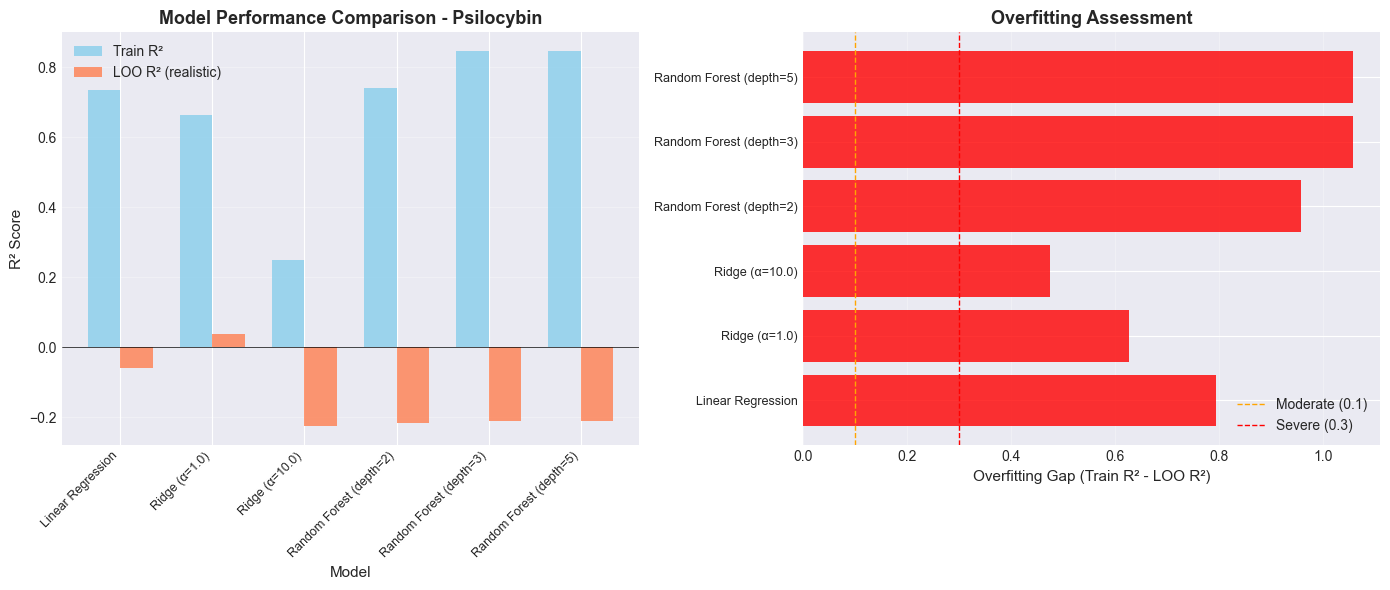


✓ Best model: Ridge (α=1.0)
  LOO R²: 0.0366
  LOO RMSE: 0.2934
  Overfitting Gap: 0.6261

--------------------------------------------------------------------------------
FEATURE ANALYSIS USING Ridge (α=1.0)
--------------------------------------------------------------------------------

Feature Coefficients:
  Feature  Coefficient  Abs_Coefficient
4   PcCpr    -0.310155         0.310155
0  ylAro1     0.084606         0.084606
1  ylAro2     0.084606         0.084606
2  ylAro4    -0.016294         0.016294
3  ylTrp2    -0.016294         0.016294


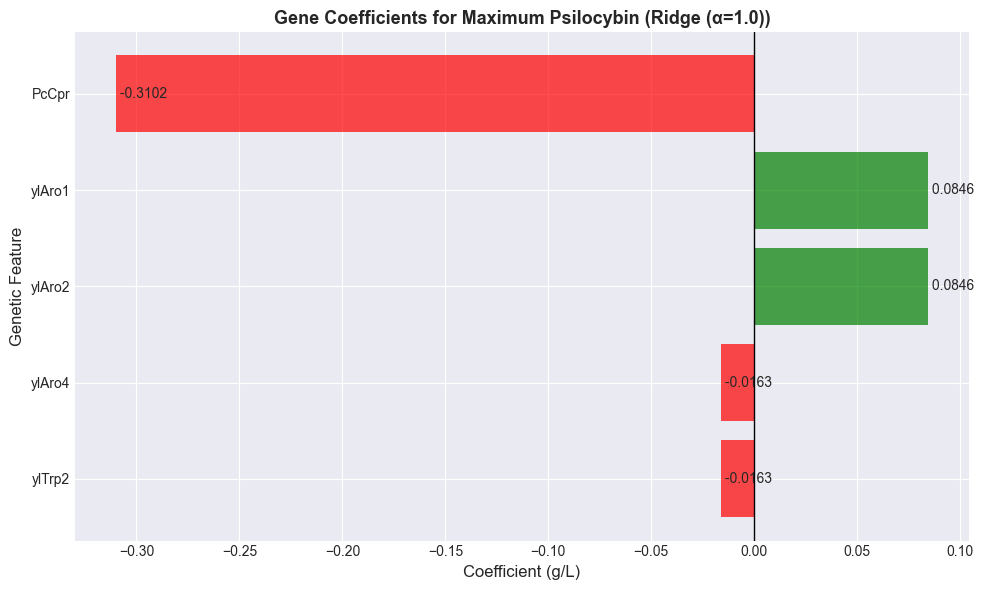


--------------------------------------------------------------------------------
PREDICTION VISUALIZATION
--------------------------------------------------------------------------------


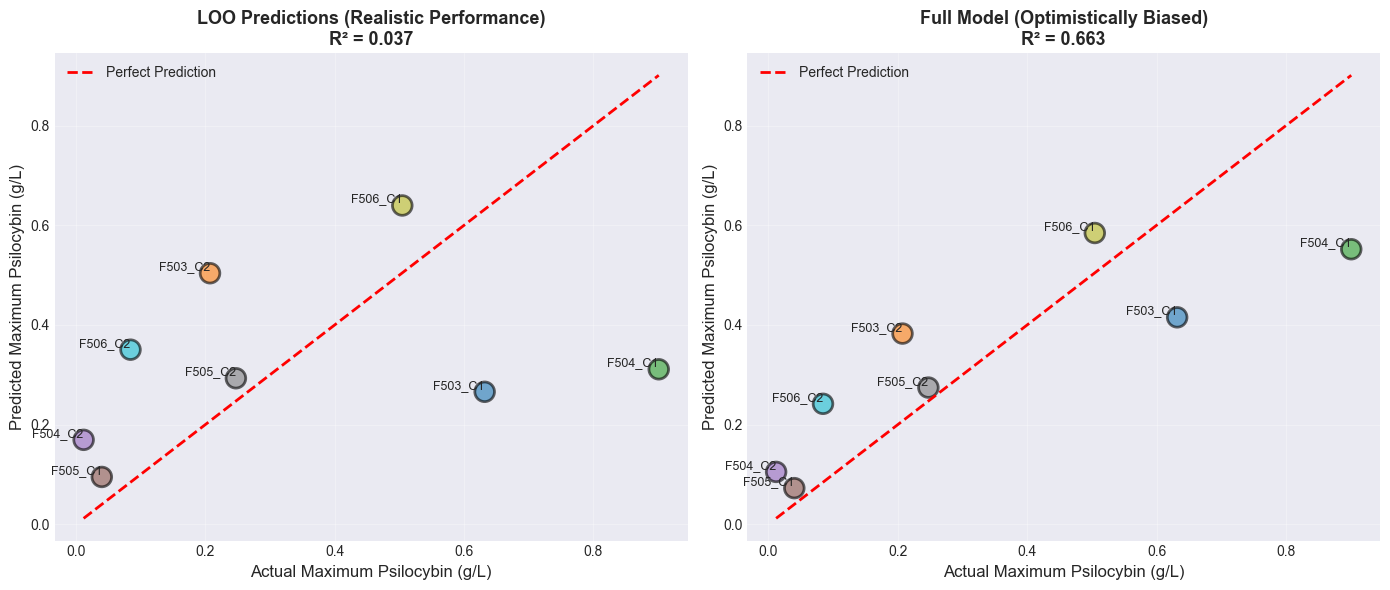


--------------------------------------------------------------------------------
GENE ASSOCIATION ANALYSIS (Descriptive Statistics)
--------------------------------------------------------------------------------
Note: With only 8 samples, these are DESCRIPTIVE observations,
not statistically validated relationships.

ylAro1:
  With gene (1):    0.4343 g/L (n=4)
  Without gene (0): 0.2228 g/L (n=4)
  Difference:       +0.2115 g/L ✓
  Strains with: ['F504_C1', 'F505_C2', 'F506_C1', 'F506_C2']
  Strains without: ['F503_C1', 'F503_C2', 'F504_C2', 'F505_C1']

ylAro2:
  With gene (1):    0.4343 g/L (n=4)
  Without gene (0): 0.2228 g/L (n=4)
  Difference:       +0.2115 g/L ✓
  Strains with: ['F504_C1', 'F505_C2', 'F506_C1', 'F506_C2']
  Strains without: ['F503_C1', 'F503_C2', 'F504_C2', 'F505_C1']

ylAro4:
  With gene (1):    0.3082 g/L (n=4)
  Without gene (0): 0.3489 g/L (n=4)
  Difference:       -0.0407 g/L ✗
  Strains with: ['F503_C2', 'F504_C1', 'F505_C1', 'F506_C2']
  Strains without:

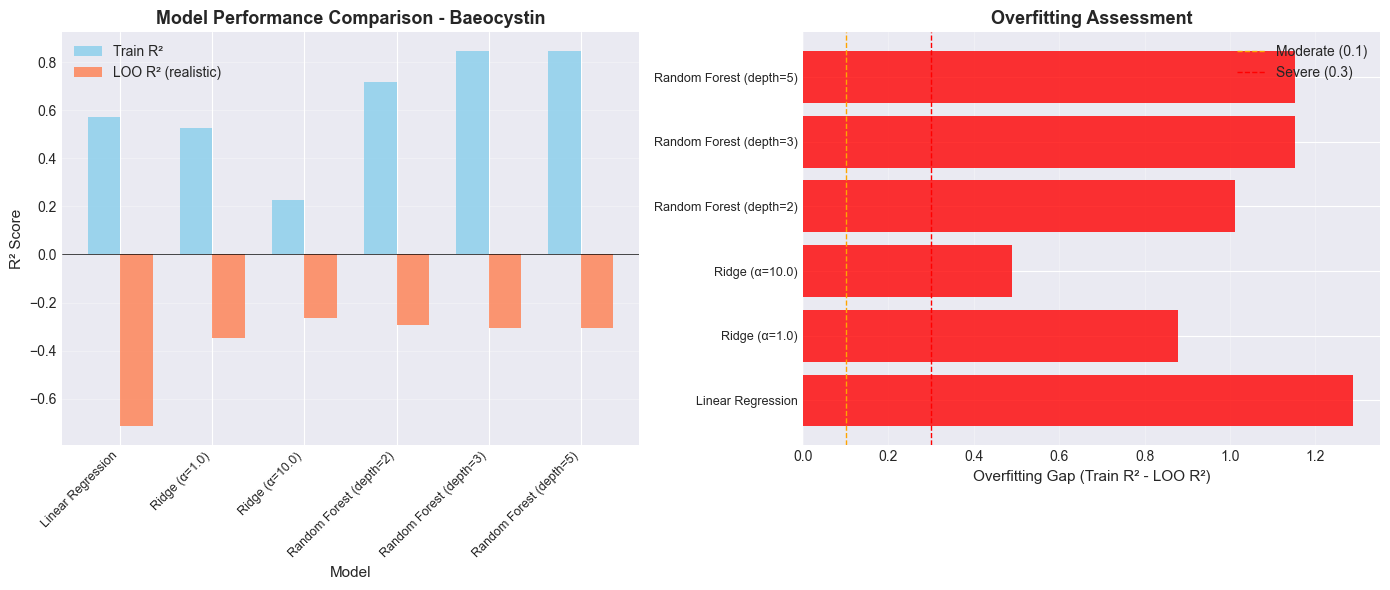


⚠️ No models show positive LOO R² - data may not support prediction

--------------------------------------------------------------------------------
FEATURE ANALYSIS USING Random Forest (depth=2)
--------------------------------------------------------------------------------

Feature Importance:
  Feature  Importance
4   PcCpr    0.362322
0  ylAro1    0.254397
1  ylAro2    0.229787
3  ylTrp2    0.078213
2  ylAro4    0.075280


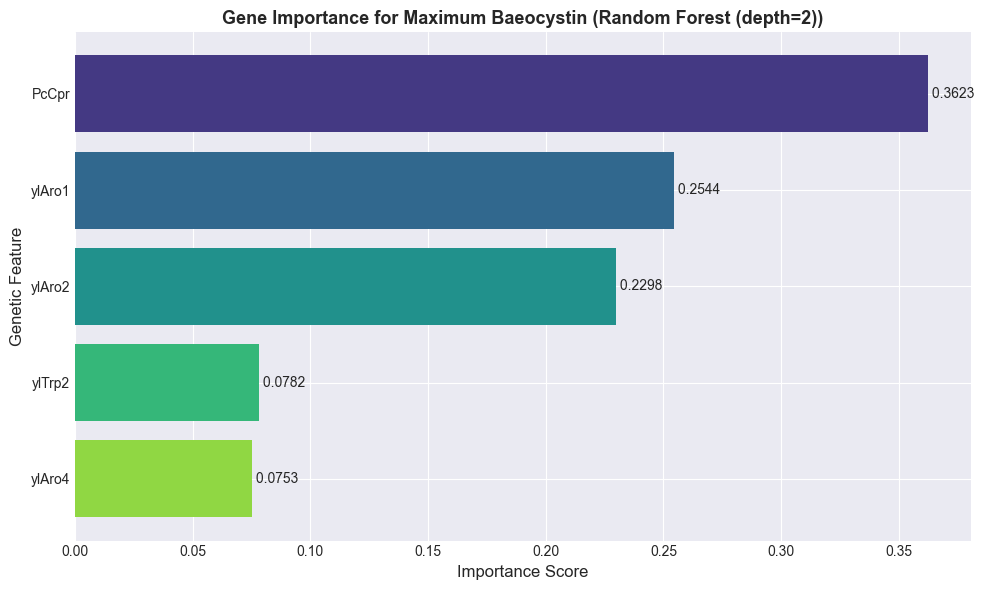


--------------------------------------------------------------------------------
PREDICTION VISUALIZATION
--------------------------------------------------------------------------------


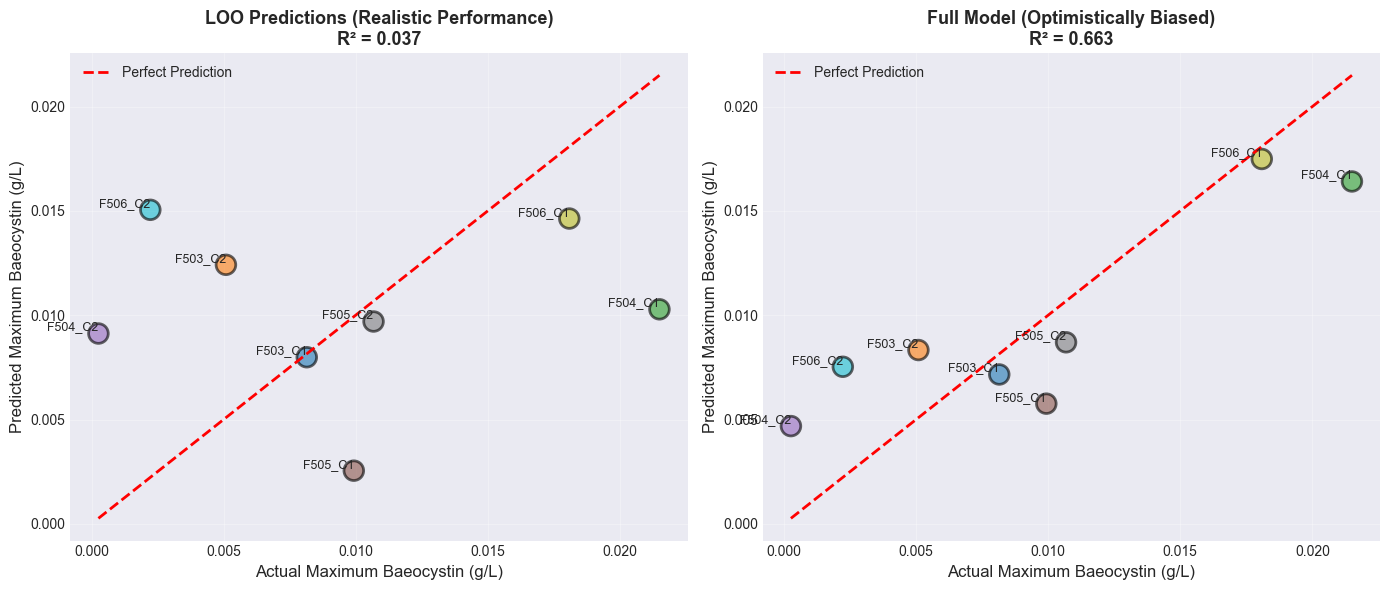


--------------------------------------------------------------------------------
GENE ASSOCIATION ANALYSIS (Descriptive Statistics)
--------------------------------------------------------------------------------
Note: With only 8 samples, these are DESCRIPTIVE observations,
not statistically validated relationships.

ylAro1:
  With gene (1):    0.0131 g/L (n=4)
  Without gene (0): 0.0059 g/L (n=4)
  Difference:       +0.0073 g/L ✓
  Strains with: ['F504_C1', 'F505_C2', 'F506_C1', 'F506_C2']
  Strains without: ['F503_C1', 'F503_C2', 'F504_C2', 'F505_C1']

ylAro2:
  With gene (1):    0.0131 g/L (n=4)
  Without gene (0): 0.0059 g/L (n=4)
  Difference:       +0.0073 g/L ✓
  Strains with: ['F504_C1', 'F505_C2', 'F506_C1', 'F506_C2']
  Strains without: ['F503_C1', 'F503_C2', 'F504_C2', 'F505_C1']

ylAro4:
  With gene (1):    0.0097 g/L (n=4)
  Without gene (0): 0.0093 g/L (n=4)
  Difference:       +0.0004 g/L ✓
  Strains with: ['F503_C2', 'F504_C1', 'F505_C1', 'F506_C2']
  Strains without:

In [37]:
# ============================================================================
# SECTION 2B: RANDOM FOREST FOR MAXIMUM YIELD PREDICTION (GENETIC FEATURES ONLY)
# WITH OVERFITTING ANALYSIS
# ============================================================================

print("\n" + "="*80)
print("SECTION 2B: MAXIMUM YIELD PREDICTION (GENETIC FEATURES ONLY)")
print("="*80)
print("Predicting maximum production capacity based solely on genetic profile")
print("="*80)

# Define genetic features for each strain
genetic_features = {
    'F503_C1': {'ylAro1': 0, 'ylAro2': 0, 'ylAro4': 0, 'ylTrp2': 0, 'PcCpr': 0},
    'F506_C1': {'ylAro1': 1, 'ylAro2': 1, 'ylAro4': 0, 'ylTrp2': 0, 'PcCpr': 0},
    'F503_C2': {'ylAro1': 0, 'ylAro2': 0, 'ylAro4': 1, 'ylTrp2': 1, 'PcCpr': 0},
    'F504_C1': {'ylAro1': 1, 'ylAro2': 1, 'ylAro4': 1, 'ylTrp2': 1, 'PcCpr': 0},
    'F504_C2': {'ylAro1': 0, 'ylAro2': 0, 'ylAro4': 0, 'ylTrp2': 0, 'PcCpr': 1},
    'F505_C2': {'ylAro1': 1, 'ylAro2': 1, 'ylAro4': 0, 'ylTrp2': 0, 'PcCpr': 1},
    'F505_C1': {'ylAro1': 0, 'ylAro2': 0, 'ylAro4': 1, 'ylTrp2': 1, 'PcCpr': 1},
    'F506_C2': {'ylAro1': 1, 'ylAro2': 1, 'ylAro4': 1, 'ylTrp2': 1, 'PcCpr': 1}
}

genetic_feature_names = ['ylAro1', 'ylAro2', 'ylAro4', 'ylTrp2', 'PcCpr']

# Map genetic features
for gene in genetic_feature_names:
    df[gene] = df['Strain'].map(lambda x: genetic_features.get(x, {}).get(gene, 0))

# Look for baeocystin column
possible_baeocystin_cols = [col for col in df.columns if 'baeocystin' in col.lower() or 'baeo' in col.lower()]

# Set target compounds
target_compounds = {
    'Psilocybin': 'Psilocybin g/L',
}

if possible_baeocystin_cols:
    target_compounds['Baeocystin'] = possible_baeocystin_cols[0]
    print(f"✓ Using '{possible_baeocystin_cols[0]}' for Baeocystin analysis")

# ============================================================================
# Create maximum yield dataset
# ============================================================================

print("\n" + "-"*80)
print("Creating maximum yield dataset...")
print("-"*80)

# Calculate maximum yield per strain (across all timepoints and replicates)
max_yield_data = []

for strain in df['Strain'].unique():
    strain_data = df[df['Strain'] == strain]
    
    row = {'Strain': strain}
    
    # Add genetic features
    for gene in genetic_feature_names:
        row[gene] = genetic_features.get(strain, {}).get(gene, 0)
    
    # Add maximum yields for each compound
    for compound_name, target_col in target_compounds.items():
        if target_col in df.columns:
            max_val = strain_data[target_col].max()
            row[f'Max_{compound_name}'] = max_val
    
    max_yield_data.append(row)

df_max = pd.DataFrame(max_yield_data)

print(f"\nMaximum yield dataset created:")
print(f"  Strains: {len(df_max)}")
print(f"\nDataset preview:")
print(df_max.sort_values(f'Max_Psilocybin', ascending=False))

# ============================================================================
# OVERFITTING ASSESSMENT
# ============================================================================

print("\n" + "="*80)
print("OVERFITTING RISK ASSESSMENT")
print("="*80)

n_samples = len(df_max)
n_features = len(genetic_feature_names)

print(f"\nDataset characteristics:")
print(f"  Number of samples (strains): {n_samples}")
print(f"  Number of features (genes): {n_features}")
print(f"  Sample-to-feature ratio: {n_samples/n_features:.2f}:1")
print(f"\n⚠️  CRITICAL: With only {n_samples} samples and {n_features} features,")
print(f"   this dataset is at HIGH RISK of overfitting.")
print(f"\nRule of thumb: Need at least 10 samples per feature for reliable ML.")
print(f"  Recommended minimum samples: {n_features * 10}")
print(f"  Current samples: {n_samples}")
print(f"  Deficit: {n_features * 10 - n_samples} samples")

# Check for unique combinations
n_unique_combos = df_max[genetic_feature_names].drop_duplicates().shape[0]
print(f"\nUnique genetic combinations: {n_unique_combos} (out of 2^{n_features} = {2**n_features} possible)")
print(f"  Each strain has a unique combination: {n_unique_combos == n_samples}")

# ============================================================================
# Run analysis for each compound
# ============================================================================

for compound_name in target_compounds.keys():
    
    print("\n" + "="*80)
    print(f"ANALYZING MAXIMUM {compound_name.upper()} YIELD")
    print("="*80)
    
    target_col = f'Max_{compound_name}'
    
    if target_col not in df_max.columns:
        print(f"⚠️ Column '{target_col}' not found. Skipping {compound_name}.")
        continue
    
    # Prepare features and target
    X = df_max[genetic_feature_names]
    y = df_max[target_col]
    
    print(f"\nFeatures: {genetic_feature_names}")
    print(f"Samples: {len(X)} (one per strain)")
    print(f"Target range: {y.min():.4f} to {y.max():.4f} g/L")
    
    # ============================================================================
    # Model Complexity Analysis - Compare different model complexities
    # ============================================================================
    
    print("\n" + "-"*80)
    print("MODEL COMPLEXITY ANALYSIS")
    print("-"*80)
    
    from sklearn.model_selection import LeaveOneOut
    from sklearn.linear_model import LinearRegression, Ridge
    
    loo = LeaveOneOut()
    
    models_to_test = {
        'Linear Regression': LinearRegression(),
        'Ridge (α=1.0)': Ridge(alpha=1.0),
        'Ridge (α=10.0)': Ridge(alpha=10.0),
        'Random Forest (depth=2)': RandomForestRegressor(n_estimators=100, max_depth=2, random_state=42),
        'Random Forest (depth=3)': RandomForestRegressor(n_estimators=100, max_depth=3, random_state=42),
        'Random Forest (depth=5)': RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42),
    }
    
    results = []
    
    for model_name, model in models_to_test.items():
        loo_preds = []
        loo_actuals = []
        
        for train_idx, test_idx in loo.split(X):
            X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
            y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
            
            model.fit(X_train, y_train)
            pred = model.predict(X_test)[0]
            
            loo_preds.append(pred)
            loo_actuals.append(y_test.iloc[0])
        
        loo_preds = np.array(loo_preds)
        loo_actuals = np.array(loo_actuals)
        
        # Calculate metrics
        train_score = model.fit(X, y).score(X, y)  # R² on full training data
        loo_rmse = np.sqrt(np.mean((loo_actuals - loo_preds)**2))
        loo_mae = np.mean(np.abs(loo_actuals - loo_preds))
        
        # Calculate LOO R²
        ss_res = np.sum((loo_actuals - loo_preds)**2)
        ss_tot = np.sum((loo_actuals - np.mean(loo_actuals))**2)
        loo_r2 = 1 - (ss_res / ss_tot)
        
        results.append({
            'Model': model_name,
            'Train_R²': train_score,
            'LOO_R²': loo_r2,
            'LOO_RMSE': loo_rmse,
            'LOO_MAE': loo_mae,
            'Overfitting_Gap': train_score - loo_r2
        })
    
    results_df = pd.DataFrame(results)
    print(f"\nModel Comparison for {compound_name}:")
    print(results_df.round(4).to_string(index=False))
    
    print(f"\n📊 Interpretation:")
    print(f"  - Train R²: Performance on all data (optimistically biased)")
    print(f"  - LOO R²: Performance on held-out data (more realistic)")
    print(f"  - Overfitting Gap: Difference between train and LOO R²")
    print(f"    → Large gap (>0.3) indicates severe overfitting")
    print(f"    → Small gap (<0.1) indicates good generalization")
    
    # Plot model comparison
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # Plot 1: R² comparison
    ax1 = axes[0]
    x_pos = np.arange(len(results_df))
    width = 0.35
    
    ax1.bar(x_pos - width/2, results_df['Train_R²'], width, 
           label='Train R²', alpha=0.8, color='skyblue')
    ax1.bar(x_pos + width/2, results_df['LOO_R²'], width, 
           label='LOO R² (realistic)', alpha=0.8, color='coral')
    
    ax1.set_xlabel('Model', fontsize=11)
    ax1.set_ylabel('R² Score', fontsize=11)
    ax1.set_title(f'Model Performance Comparison - {compound_name}', fontsize=13, fontweight='bold')
    ax1.set_xticks(x_pos)
    ax1.set_xticklabels(results_df['Model'], rotation=45, ha='right', fontsize=9)
    ax1.legend()
    ax1.grid(True, alpha=0.3, axis='y')
    ax1.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
    
    # Plot 2: Overfitting gap
    ax2 = axes[1]
    colors = ['red' if gap > 0.3 else 'orange' if gap > 0.1 else 'green' 
              for gap in results_df['Overfitting_Gap']]
    bars = ax2.barh(range(len(results_df)), results_df['Overfitting_Gap'], color=colors, alpha=0.8)
    ax2.set_yticks(range(len(results_df)))
    ax2.set_yticklabels(results_df['Model'], fontsize=9)
    ax2.set_xlabel('Overfitting Gap (Train R² - LOO R²)', fontsize=11)
    ax2.set_title('Overfitting Assessment', fontsize=13, fontweight='bold')
    ax2.axvline(x=0.1, color='orange', linestyle='--', linewidth=1, label='Moderate (0.1)')
    ax2.axvline(x=0.3, color='red', linestyle='--', linewidth=1, label='Severe (0.3)')
    ax2.legend()
    ax2.grid(True, alpha=0.3, axis='x')
    
    plt.tight_layout()
    # plt.savefig(f'overfitting_analysis_{compound_name.lower()}.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # ============================================================================
    # Select best model (lowest overfitting gap with reasonable LOO R²)
    # ============================================================================
    
    # Filter models with LOO R² > 0 (better than mean baseline)
    viable_models = results_df[results_df['LOO_R²'] > 0].copy()
    
    if len(viable_models) > 0:
        # Select model with best LOO R² among those with gap < 0.3
        low_overfit = viable_models[viable_models['Overfitting_Gap'] < 0.3]
        if len(low_overfit) > 0:
            best_model_row = low_overfit.loc[low_overfit['LOO_R²'].idxmax()]
        else:
            best_model_row = viable_models.loc[viable_models['LOO_R²'].idxmax()]
        
        best_model_name = best_model_row['Model']
        print(f"\n✓ Best model: {best_model_name}")
        print(f"  LOO R²: {best_model_row['LOO_R²']:.4f}")
        print(f"  LOO RMSE: {best_model_row['LOO_RMSE']:.4f}")
        print(f"  Overfitting Gap: {best_model_row['Overfitting_Gap']:.4f}")
        
        # Use the best model for further analysis
        best_model = models_to_test[best_model_name]
        best_model.fit(X, y)
    else:
        print("\n⚠️ No models show positive LOO R² - data may not support prediction")
        best_model_name = 'Random Forest (depth=2)'
        best_model = models_to_test[best_model_name]
        best_model.fit(X, y)
    
    # ============================================================================
    # Feature Importance (if applicable)
    # ============================================================================
    
    print("\n" + "-"*80)
    print(f"FEATURE ANALYSIS USING {best_model_name}")
    print("-"*80)
    
    if hasattr(best_model, 'feature_importances_'):
        # Random Forest
        feature_importance = pd.DataFrame({
            'Feature': genetic_feature_names,
            'Importance': best_model.feature_importances_
        }).sort_values('Importance', ascending=False)
        
        print(f"\nFeature Importance:")
        print(feature_importance)
        
        # Plot Feature Importance
        fig, ax = plt.subplots(figsize=(10, 6))
        colors = sns.color_palette("viridis", len(feature_importance))
        bars = ax.barh(range(len(feature_importance)), feature_importance['Importance'], color=colors)
        ax.set_yticks(range(len(feature_importance)))
        ax.set_yticklabels(feature_importance['Feature'])
        ax.set_xlabel('Importance Score', fontsize=12)
        ax.set_ylabel('Genetic Feature', fontsize=12)
        ax.set_title(f'Gene Importance for Maximum {compound_name} ({best_model_name})', 
                     fontsize=13, fontweight='bold')
        ax.invert_yaxis()
        
        for i, (idx, row) in enumerate(feature_importance.iterrows()):
            ax.text(row['Importance'], i, f" {row['Importance']:.4f}", 
                    va='center', fontsize=10)
        
        plt.tight_layout()
        # plt.savefig(f'feature_importance_{compound_name.lower()}_best_model.png', dpi=300, bbox_inches='tight')
        plt.show()
        
    elif hasattr(best_model, 'coef_'):
        # Linear/Ridge regression
        feature_coefs = pd.DataFrame({
            'Feature': genetic_feature_names,
            'Coefficient': best_model.coef_,
            'Abs_Coefficient': np.abs(best_model.coef_)
        }).sort_values('Abs_Coefficient', ascending=False)
        
        print(f"\nFeature Coefficients:")
        print(feature_coefs)
        
        # Plot coefficients
        fig, ax = plt.subplots(figsize=(10, 6))
        colors = ['green' if c > 0 else 'red' for c in feature_coefs['Coefficient']]
        bars = ax.barh(range(len(feature_coefs)), feature_coefs['Coefficient'], color=colors, alpha=0.7)
        ax.set_yticks(range(len(feature_coefs)))
        ax.set_yticklabels(feature_coefs['Feature'])
        ax.set_xlabel('Coefficient (g/L)', fontsize=12)
        ax.set_ylabel('Genetic Feature', fontsize=12)
        ax.set_title(f'Gene Coefficients for Maximum {compound_name} ({best_model_name})', 
                     fontsize=13, fontweight='bold')
        ax.axvline(x=0, color='black', linestyle='-', linewidth=1)
        ax.invert_yaxis()
        
        for i, (idx, row) in enumerate(feature_coefs.iterrows()):
            ax.text(row['Coefficient'], i, f" {row['Coefficient']:.4f}", 
                    va='center', fontsize=10)
        
        plt.tight_layout()
        # plt.savefig(f'feature_coefficients_{compound_name.lower()}_best_model.png', dpi=300, bbox_inches='tight')
        plt.show()
    
    # ============================================================================
    # Predicted vs Actual with LOO predictions
    # ============================================================================
    
    print("\n" + "-"*80)
    print("PREDICTION VISUALIZATION")
    print("-"*80)
    
    # Get LOO predictions
    loo_preds = []
    for train_idx, test_idx in loo.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train = y.iloc[train_idx]
        temp_model = type(best_model)(**best_model.get_params())
        temp_model.fit(X_train, y_train)
        loo_preds.append(temp_model.predict(X_test)[0])
    
    loo_preds = np.array(loo_preds)
    
    # Full model predictions
    y_pred_full = best_model.predict(X)
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # Plot 1: LOO Predictions (realistic)
    ax1 = axes[0]
    scatter = ax1.scatter(y, loo_preds, s=200, alpha=0.6, 
                         c=range(len(df_max)), cmap='tab10',
                         edgecolors='black', linewidth=2)
    
    for idx, row in df_max.iterrows():
        ax1.annotate(row['Strain'], (row[target_col], loo_preds[idx]), 
                    fontsize=9, ha='right', va='bottom')
    
    ax1.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Perfect Prediction')
    ax1.set_xlabel(f'Actual Maximum {compound_name} (g/L)', fontsize=12)
    ax1.set_ylabel(f'Predicted Maximum {compound_name} (g/L)', fontsize=12)
    ax1.set_title(f'LOO Predictions (Realistic Performance)\nR² = {best_model_row["LOO_R²"]:.3f}', 
                 fontsize=13, fontweight='bold')
    ax1.grid(True, alpha=0.3)
    ax1.legend()
    
    # Plot 2: Full Model Predictions (optimistic)
    ax2 = axes[1]
    scatter = ax2.scatter(y, y_pred_full, s=200, alpha=0.6, 
                         c=range(len(df_max)), cmap='tab10',
                         edgecolors='black', linewidth=2)
    
    for idx, row in df_max.iterrows():
        ax2.annotate(row['Strain'], (row[target_col], y_pred_full[idx]), 
                    fontsize=9, ha='right', va='bottom')
    
    ax2.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Perfect Prediction')
    ax2.set_xlabel(f'Actual Maximum {compound_name} (g/L)', fontsize=12)
    ax2.set_ylabel(f'Predicted Maximum {compound_name} (g/L)', fontsize=12)
    ax2.set_title(f'Full Model (Optimistically Biased)\nR² = {best_model_row["Train_R²"]:.3f}', 
                 fontsize=13, fontweight='bold')
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    
    plt.tight_layout()
    # plt.savefig(f'predictions_comparison_{compound_name.lower()}.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # ============================================================================
    # Gene Association Analysis (non-parametric)
    # ============================================================================
    
    print("\n" + "-"*80)
    print(f"GENE ASSOCIATION ANALYSIS (Descriptive Statistics)")
    print("-"*80)
    print("Note: With only 8 samples, these are DESCRIPTIVE observations,")
    print("not statistically validated relationships.")
    
    for gene in genetic_feature_names:
        with_gene = df_max[df_max[gene] == 1][target_col]
        without_gene = df_max[df_max[gene] == 0][target_col]
        
        if len(with_gene) > 0 and len(without_gene) > 0:
            mean_with = with_gene.mean()
            mean_without = without_gene.mean()
            diff = mean_with - mean_without
            
            print(f"\n{gene}:")
            print(f"  With gene (1):    {mean_with:.4f} g/L (n={len(with_gene)})")
            print(f"  Without gene (0): {mean_without:.4f} g/L (n={len(without_gene)})")
            print(f"  Difference:       {diff:+.4f} g/L {'✓' if diff > 0 else '✗'}")
            print(f"  Strains with: {list(df_max[df_max[gene]==1]['Strain'].values)}")
            print(f"  Strains without: {list(df_max[df_max[gene]==0]['Strain'].values)}")

# ============================================================================
# SUMMARY AND RECOMMENDATIONS
# ============================================================================

print("\n" + "="*80)
print("SUMMARY AND RECOMMENDATIONS")
print("="*80)

print(f"""
KEY FINDINGS:

1. SAMPLE SIZE LIMITATION:
   - Only {len(df_max)} strains available for training
   - Need ~50 samples for robust ML with 5 features
   - Current analysis is EXPLORATORY, not predictive

2. OVERFITTING RISK:
   - High risk with complex models (deep Random Forests)
   - Simpler models (Linear/Ridge) may generalize better
   - Leave-One-Out CV provides realistic performance estimates

3. RECOMMENDED APPROACH:
   - Use LOO R² as the realistic performance metric
   - Prefer simpler models (linear/ridge) over complex ones
   - Treat feature importance as DESCRIPTIVE, not causal
   - Focus on gene association analysis (with/without comparisons)
   - Consider collecting more strains for validation

4. FOR PUBLICATION:
   - Report LOO metrics, not full-data R²
   - Acknowledge small sample size limitations
   - Present as hypothesis-generating, not confirmatory
   - Show sensitivity to model choice (model comparison plot)
   - Consider statistical tests on original timepoint data instead

5. ALTERNATIVE ANALYSES:
   - Use all timepoints with mixed-effects models
   - Statistical testing (t-tests, ANOVA) on max yields
   - Correlation analysis between genes and yields
   - Focus on descriptive comparisons rather than ML prediction
""")